<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Project Title</h3> </center>
<center><h4>Team Member Names</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In this section, orient your readers to your project. You've already written some of these in previous deliverables. Based on your final analysis, revise your problem statement and write a concise introduction section. This section should touch upon the following points, but should be written in full paragraphs. Your writing should incorporate all of these points (and more if you like) in a coherent way. Remember that you are trying to convince your readers that this is an important problem to tackle. 

Problem Statement
* Describe the problem you would like to tackle. 
* What is the topic of your project? 
* What do you want to learn about it?

Significance of the Problem
* Why is it important to tackle this problem in your project?
* In what ways could the insights from this project be useful?
* **(optional)** Has there been previous work on your topic in terms of applying ML techniques to analyze similar datasets? Do some research into your topic. What algorithms were used? What was the performance of those algorithms? Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

Questions/Hypothesis
* End this section with a list of questions and hypotheses
* You should tie these questions/hypotheses to the problem statement and its significance
    * e.g. Given the aforementioned problem and its importance, we set out to tackle the following questions:
    
**Requirement:**
* You should have at least one question tapping into the comparison of various machine learning algorithms (at least three) in predicting/classifying your target variable from your features variables.
* You should have at least one hypothesis regarding the relationship between two variables, which may be different from your ML problem.



While this section provides bullet points as prompts, your Introduction should consist of coherent paragraphs. As noted in the rubric, you are required delete all the prompts from this template, except for headings. Failing to do so will result in substantial point deductions.

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a **separate** script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset (i.e., what it is about) and the number of variables/rows included.


### 2.2. Data Analysis
* For your hypotheses, what are your IVs and DVs?
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables? Why do you think those are important predictors?
* Describe why this is a supervised ML problem and identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? **Why?** You should compare at least three algorithms.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

In [1]:
import csv
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


In [4]:
pd.set_option('display.max_columns', None)

In [7]:
#Read the data 
data = pd.read_csv('vehicles.csv')

In [8]:
data

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,NaN,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,NaN,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,NaN,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,8 cylinders,gas,164000.0,clean,automatic,1J8HR48N78C242593,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


### Data cleaning

In [13]:
# drop NA values
df = data.copy().dropna()
df = df.drop_duplicates()
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
19,19,7235942858,https://auburn.craigslist.org/cto/d/auburn-202...,auburn,https://auburn.craigslist.org,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,1C6JJTEG0LL206955,4wd,full-size,pickup,grey,https://images.craigslist.org/00909_kPkElEcTZ5...,I'm putting up for sale my Jeep Gladiator. I j...,al,32.611442,-85.481615,2020-11-23T15:02:02-0600
91,91,7240569685,https://bham.craigslist.org/ctd/d/cartersville...,birmingham,https://bham.craigslist.org,24999,2016.0,mercedes-benz,benz c300 4matic,like new,4 cylinders,gas,18823.0,clean,automatic,55SWF4KBXGU177602,rwd,full-size,sedan,white,https://images.craigslist.org/00M0M_jvdDIzsekt...,2016 Mercedes BENZ C300-4MATIC-AWD YES ONLY 18...,al,34.206619,-84.777696,2020-12-02T13:14:57-0600
92,92,7240567296,https://bham.craigslist.org/ctd/d/summerville-...,birmingham,https://bham.craigslist.org,41900,2016.0,jeep,wrangler,good,6 cylinders,gas,13036.0,clean,automatic,1C4BJWEG7GL227466,4wd,full-size,SUV,white,https://images.craigslist.org/00M0M_cquuYs5OeK...,"2016 Jeep Wrangler Unlimited Sahara 4WD - $41,...",al,34.466560,-85.358940,2020-12-02T13:11:19-0600
93,93,7240566811,https://bham.craigslist.org/ctd/d/summerville-...,birmingham,https://bham.craigslist.org,23900,2005.0,gmc,sierra 3500,good,8 cylinders,diesel,145970.0,clean,automatic,1GTJK33265F893647,4wd,full-size,truck,white,https://images.craigslist.org/00202_jIsmWQ0vhC...,"2005 GMC Sierra 3500 SLT Crew Cab 4WD - $23,90...",al,34.466560,-85.358940,2020-12-02T13:10:38-0600
95,95,7240566722,https://bham.craigslist.org/ctd/d/summerville-...,birmingham,https://bham.craigslist.org,18900,2012.0,chevrolet,silverado 3500hd,good,8 cylinders,diesel,177450.0,clean,automatic,1GB3CZCL4CF186095,rwd,full-size,truck,white,https://images.craigslist.org/00y0y_NL74aBjE1B...,2012 Chevrolet Silverado 3500HD Work Truck Lon...,al,34.466560,-85.358940,2020-12-02T13:10:29-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458154,458154,7240979817,https://milwaukee.craigslist.org/ctd/d/mukwona...,milwaukee,https://milwaukee.craigslist.org,0,2015.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,70885.0,clean,automatic,1C4BJWEG0FL668113,4wd,full-size,SUV,red,https://images.craigslist.org/00e0e_bk64cPmhJ4...,💥💥💥 WE ARE A DEALERSHIP AND WE USE LIVE MARKET...,wi,42.857878,-88.309457,2020-12-03T09:32:43-0600
458195,458195,7240981040,https://sheboygan.craigslist.org/ctd/d/manitow...,sheboygan,https://sheboygan.craigslist.org,20488,2010.0,gmc,sierra 1500,excellent,8 cylinders,gas,63812.0,clean,automatic,3GTRKWE36AG215287,4wd,mid-size,truck,black,https://images.craigslist.org/00P0P_bnajhQgGn3...,big> 2010 GMC Sierra 1500 SLT - Carbon Black M...,wi,44.078180,-87.696800,2020-12-03T09:34:37-0600
458202,458202,7240989873,https://wausau.craigslist.org/ctd/d/auburndale...,wausau,https://wausau.craigslist.org,4995,2005.0,buick,rendezvous cx,good,6 cylinders,gas,137962.0,clean,automatic,3G5DB03E05S549305,fwd,compact,SUV,grey,https://images.craigslist.org/00j0j_fzzhvpvful...,2005 Buick Rendezvous CX. 3.4 V6. Need that ...,wi,44.631225,-90.022076,2020-12-03T09:48:38-0600
458204,458204,7240975107,https://wausau.craigslist.org/ctd/d/auburndale...,wausau,https://wausau.craigslist.org,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,2G4WC582161287362,fwd,mid-size,sedan,black,https://images.craigslist.org/01010_cdS54li18Y...,"2006 Buick Lacrosse, CX 3.8 V6, 1 owner, clean...",wi,44.631225,-90.022076,2020-12-03T09:24:54-0600


In [10]:
# looks like the odometer column has a potential outlier
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,42384.000000,4.238400e+04,4.238400e+04,42384.000000,4.238400e+04,42384.000000,42384.000000
mean,226301.133989,7.235361e+09,1.453108e+04,2011.031757,1.544471e+05,38.624541,-92.190841
std,128907.684372,4.459744e+06,1.074701e+05,6.782475,9.927166e+06,5.610065,17.351155
min,19.000000,7.224683e+09,0.000000e+00,1927.000000,0.000000e+00,-1.121187,-159.365637
25%,114798.000000,7.232343e+09,5.950000e+03,2008.000000,6.314100e+04,34.900670,-98.615578
50%,221929.000000,7.236582e+09,1.099500e+04,2012.000000,1.015530e+05,39.286850,-86.769666
75%,336676.500000,7.239357e+09,1.899000e+04,2015.000000,1.397528e+05,42.504823,-79.728200
max,458211.000000,7.241017e+09,2.200000e+07,2021.000000,2.043756e+09,64.823942,94.163200


In [25]:
# get rid of values where the car has more than 500,000 miles on it to remain realistic
df = df[df['odometer'] < 500000]
df

,level_0,index,id,url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,description,lat,long
0,0,0,7235942858,https://auburn.craigslist.org/cto/d/auburn-202...,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,https://images.craigslist.org/00909_kPkElEcTZ5...,I'm putting up for sale my Jeep Gladiator. I j...,32.611442,-85.481615
1,1,1,7240569685,https://bham.craigslist.org/ctd/d/cartersville...,24999,2016.0,mercedes-benz,benz c300 4matic,like new,4 cylinders,gas,18823.0,clean,automatic,rwd,full-size,sedan,white,https://images.craigslist.org/00M0M_jvdDIzsekt...,2016 Mercedes BENZ C300-4MATIC-AWD YES ONLY 18...,34.206619,-84.777696
2,2,2,7240567296,https://bham.craigslist.org/ctd/d/summerville-...,41900,2016.0,jeep,wrangler,good,6 cylinders,gas,13036.0,clean,automatic,4wd,full-size,SUV,white,https://images.craigslist.org/00M0M_cquuYs5OeK...,"2016 Jeep Wrangler Unlimited Sahara 4WD - $41,...",34.466560,-85.358940
3,3,3,7240566811,https://bham.craigslist.org/ctd/d/summerville-...,23900,2005.0,gmc,sierra 3500,good,8 cylinders,diesel,145970.0,clean,automatic,4wd,full-size,truck,white,https://images.craigslist.org/00202_jIsmWQ0vhC...,"2005 GMC Sierra 3500 SLT Crew Cab 4WD - $23,90...",34.466560,-85.358940
4,4,4,7240566722,https://bham.craigslist.org/ctd/d/summerville-...,18900,2012.0,chevrolet,silverado 3500hd,good,8 cylinders,diesel,177450.0,clean,automatic,rwd,full-size,truck,white,https://images.craigslist.org/00y0y_NL74aBjE1B...,2012 Chevrolet Silverado 3500HD Work Truck Lon...,34.466560,-85.358940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42379,42379,42379,7240979817,https://milwaukee.craigslist.org/ctd/d/mukwona...,0,2015.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,70885.0,clean,automatic,4wd,full-size,SUV,red,https://images.craigslist.org/00e0e_bk64cPmhJ4...,💥💥💥 WE ARE A DEALERSHIP AND WE USE LIVE MARKET...,42.857878,-88.309457
42380,42380,42380,7240981040,https://sheboygan.craigslist.org/ctd/d/manitow...,20488,2010.0,gmc,sierra 1500,excellent,8 cylinders,gas,63812.0,clean,automatic,4wd,mid-size,truck,black,https://images.craigslist.org/00P0P_bnajhQgGn3...,big> 2010 GMC Sierra 1500 SLT - Carbon Black M...,44.078180,-87.696800
42381,42381,42381,7240989873,https://wausau.craigslist.org/ctd/d/auburndale...,4995,2005.0,buick,rendezvous cx,good,6 cylinders,gas,137962.0,clean,automatic,fwd,compact,SUV,grey,https://images.craigslist.org/00j0j_fzzhvpvful...,2005 Buick Rendezvous CX. 3.4 V6. Need that ...,44.631225,-90.022076
42382,42382,42382,7240975107,https://wausau.craigslist.org/ctd/d/auburndale...,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,https://images.craigslist.org/01010_cdS54li18Y...,"2006 Buick Lacrosse, CX 3.8 V6, 1 owner, clean...",44.631225,-90.022076


In [24]:
# drop columns that don't provide value or provide duplicate information (i.e. region duplicated lat/long data)
df.reset_index(inplace = True)
df.drop(columns = ['index', 'Unnamed: 0', 'Unnamed: 0.1','region',  'region_url', 'VIN', 'state','posting_date'], inplace = True)
df.head()

ValueError: cannot insert level_0, already exists

In [23]:
df.columns

Index(['level_0', 'index', 'id', 'url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'image_url',
       'description', 'lat', 'long'],
      dtype='object')

In [25]:
# looking at number of unique number of values for each column
df.nunique()

index           42312
id              42312
price            3782
year               86
manufacturer       41
model            6052
condition           6
cylinders           8
fuel                5
odometer        20755
title_status        6
transmission        3
drive               3
size                4
type               13
paint_color        12
lat             10737
long            10661
model_year      13978
dtype: int64

In [26]:
# create column of model and year
df['model_year'] = df['model'] + "_" + df['year'].astype(str)

# check for unique values in this column
df['model_year'].nunique()

13978

In [27]:
# look at df by model_year
df.sort_values(by = ['model_year'])

# drop duplicates where multiple cars with many of the same features
df1 = df[['model_year', 'price', 'condition', 'fuel', 'title_status','cylinders', 'drive', 'odometer', 'size','type', 'paint_color']].drop_duplicates()
df

,index,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,model_year
0,0,7235942858,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,32.611442,-85.481615,gladiator_2020.0
1,1,7240569685,24999,2016.0,mercedes-benz,benz c300 4matic,like new,4 cylinders,gas,18823.0,clean,automatic,rwd,full-size,sedan,white,34.206619,-84.777696,benz c300 4matic_2016.0
2,2,7240567296,41900,2016.0,jeep,wrangler,good,6 cylinders,gas,13036.0,clean,automatic,4wd,full-size,SUV,white,34.466560,-85.358940,wrangler_2016.0
3,3,7240566811,23900,2005.0,gmc,sierra 3500,good,8 cylinders,diesel,145970.0,clean,automatic,4wd,full-size,truck,white,34.466560,-85.358940,sierra 3500_2005.0
4,4,7240566722,18900,2012.0,chevrolet,silverado 3500hd,good,8 cylinders,diesel,177450.0,clean,automatic,rwd,full-size,truck,white,34.466560,-85.358940,silverado 3500hd_2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42307,42307,7240979817,0,2015.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,70885.0,clean,automatic,4wd,full-size,SUV,red,42.857878,-88.309457,wrangler unlimited sahara_2015.0
42308,42308,7240981040,20488,2010.0,gmc,sierra 1500,excellent,8 cylinders,gas,63812.0,clean,automatic,4wd,mid-size,truck,black,44.078180,-87.696800,sierra 1500_2010.0
42309,42309,7240989873,4995,2005.0,buick,rendezvous cx,good,6 cylinders,gas,137962.0,clean,automatic,fwd,compact,SUV,grey,44.631225,-90.022076,rendezvous cx_2005.0
42310,42310,7240975107,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,44.631225,-90.022076,lacrosse cx_2006.0


In [28]:
# group by the key features to find an average price, lat, and long
df_agg = df.groupby(by = ['model_year', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']).mean()

# reset index
df_agg.reset_index(inplace = True)

# drop id column that we no longer need
df_agg.drop(columns = ['id'], inplace = True)
df_agg

,model_year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,index,price,year,lat,long
0,(300)_2006.0,good,8 cylinders,gas,14000.0,clean,automatic,4wd,full-size,other,white,26480.0,10000.0,2006.0,40.894300,-73.977200
1,- galaxie_1959.0,excellent,8 cylinders,gas,40964.0,clean,manual,rwd,full-size,sedan,black,22552.0,20590.0,1959.0,35.010800,-80.926600
2,-350 refrigerated box_2009.0,like new,8 cylinders,hybrid,32250.0,clean,automatic,fwd,full-size,truck,white,18283.0,14995.0,2009.0,42.659300,-83.122500
3,/ edge_2016.0,excellent,4 cylinders,gas,79080.0,clean,automatic,4wd,mid-size,SUV,blue,16618.0,16900.0,2016.0,44.358000,-69.867000
4,1 series_2010.0,good,6 cylinders,gas,89000.0,clean,automatic,rwd,compact,coupe,black,13664.0,9500.0,2010.0,41.599400,-86.707700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28549,zdx_2011.0,good,6 cylinders,gas,125697.0,clean,automatic,4wd,mid-size,coupe,white,28317.0,14995.0,2011.0,41.458309,-81.779049
28550,zdx_2011.0,like new,6 cylinders,gas,54000.0,clean,automatic,4wd,mid-size,SUV,white,11828.0,17000.0,2011.0,46.403712,-117.055301
28551,zephyr_2006.0,excellent,6 cylinders,gas,64000.0,clean,automatic,fwd,mid-size,sedan,black,27935.0,6800.0,2006.0,34.828500,-82.351600
28552,zephyr_2006.0,like new,6 cylinders,gas,89231.0,clean,automatic,fwd,full-size,sedan,grey,6690.0,4450.0,2006.0,41.670181,-72.934584


### Preprocess variables

In [29]:
# create dataframe that contains columns that need to be One Hot Encoded
encoded_features = df_agg[['condition','cylinders', 'fuel', 
                           'title_status', 'transmission','drive', 
                           'size', 'type', 'paint_color']]


# one hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
encoded_df = encoder.fit_transform(encoded_features)

encoded_features_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names())
encoded_features_df.head()

,x0_excellent,x0_fair,x0_good,x0_like new,x0_new,x0_salvage,x1_10 cylinders,x1_12 cylinders,x1_3 cylinders,x1_4 cylinders,x1_5 cylinders,x1_6 cylinders,x1_8 cylinders,x1_other,x2_diesel,x2_electric,x2_gas,x2_hybrid,x2_other,x3_clean,x3_lien,x3_missing,x3_parts only,x3_rebuilt,x3_salvage,x4_automatic,x4_manual,x4_other,x5_4wd,x5_fwd,x5_rwd,x6_compact,x6_full-size,x6_mid-size,x6_sub-compact,x7_SUV,x7_bus,x7_convertible,x7_coupe,x7_hatchback,x7_mini-van,x7_offroad,x7_other,x7_pickup,x7_sedan,x7_truck,x7_van,x7_wagon,x8_black,x8_blue,x8_brown,x8_custom,x8_green,x8_grey,x8_orange,x8_purple,x8_red,x8_silver,x8_white,x8_yellow
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# create dataframe that contains columns that need to be binned
discretizer_features = df_agg[['lat', 'long']]

from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins = 5, encode = "onehot-dense", strategy = "quantile")

latlong_discretized = discretizer.fit_transform(discretizer_features)

kbins_features_df = pd.DataFrame(latlong_discretized, columns = ["lat1", "lat2", "lat3", "lat4", "lat5",
                                                        "long1", "long2", "long3", "long4", "long5"])
kbins_features_df.head()

,lat1,lat2,lat3,lat4,lat5,long1,long2,long3,long4,long5
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
# create dataframe with columns that are ready to use
standadize_features = df_agg['odometer'].values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler

#create the scaler
scaler = MinMaxScaler()

#fit the scaler to the training data(features only)
scaler.fit(standadize_features) 

standadize_features_array = scaler.transform(standadize_features) 
standadize_features_df = pd.DataFrame(standadize_features_array, columns = ['odometer'])
standadize_features_df.describe()

,odometer
count,28554.000000
mean,0.238211
std,0.130342
min,0.000000
25%,0.145272
50%,0.232181
75%,0.319860
max,1.000000


In [32]:
# create dataframe with columns that are ready to use
reg_features_df = df_agg[['price', 'year']]

In [33]:
merged_df = encoded_features_df.merge(kbins_features_df, left_index = True, right_index = True).merge(
    standadize_features_df, left_index = True, right_index = True).merge(
    reg_features_df, left_index = True, right_index = True)

merged_df

,x0_excellent,x0_fair,x0_good,x0_like new,x0_new,x0_salvage,x1_10 cylinders,x1_12 cylinders,x1_3 cylinders,x1_4 cylinders,x1_5 cylinders,x1_6 cylinders,x1_8 cylinders,x1_other,x2_diesel,x2_electric,x2_gas,x2_hybrid,x2_other,x3_clean,x3_lien,x3_missing,x3_parts only,x3_rebuilt,x3_salvage,x4_automatic,x4_manual,x4_other,x5_4wd,x5_fwd,x5_rwd,x6_compact,x6_full-size,x6_mid-size,x6_sub-compact,x7_SUV,x7_bus,x7_convertible,x7_coupe,x7_hatchback,x7_mini-van,x7_offroad,x7_other,x7_pickup,x7_sedan,x7_truck,x7_van,x7_wagon,x8_black,x8_blue,x8_brown,x8_custom,x8_green,x8_grey,x8_orange,x8_purple,x8_red,x8_silver,x8_white,x8_yellow,lat1,lat2,lat3,lat4,lat5,long1,long2,long3,long4,long5,odometer,price,year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.031289,10000.0,2006.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.091553,20590.0,1959.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.072078,14995.0,2009.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.176741,16900.0,2016.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.198912,9500.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28549,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.280928,14995.0,2011.0
28550,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.120688,17000.0,2011.0
28551,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.143038,6800.0,2006.0
28552,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.199428,4450.0,2006.0


In [34]:
# ensure original DataFrames have same shape as new merged DataFrame
[encoded_features_df.shape, kbins_features_df.shape, standadize_features_df.shape, reg_features_df.shape]

[(28554, 60), (28554, 10), (28554, 1), (28554, 2)]

### Feature selection

In [35]:
target = merged_df['price']
features = merged_df.drop('price', axis=1)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

In [37]:
#define a selection method and specify the score function to be f_regression
select = SelectKBest(score_func = f_regression, k = 10)
select.fit(X_train, y_train)

#transform training and testing sets so only the selected features are retained
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X=X_train, y=y_train)

print("Original results:")
print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train)))
print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))


model = LinearRegression().fit(X=X_train_selected, y=y_train)

print("With selected features:")
print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))
print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_selected)))

Original results:
	R-squared value for training set:  0.4521287238878837
	R-squared value for testing set:  0.0010359969041037198
With selected features:
	R-squared value for training set:  0.4216520082888784
	R-squared value for testing set:  0.0009670834188668653


In [39]:
select.get_support()

array([False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True])

In [40]:
cols = pd.DataFrame(list(select.get_support()), list(features.columns))
selected_features = cols[cols[0] == True]

In [41]:
selected_features.reset_index()

,index,0
0,x1_4 cylinders,True
1,x1_8 cylinders,True
2,x2_diesel,True
3,x5_4wd,True
4,x5_fwd,True
5,x6_full-size,True
6,x7_sedan,True
7,x7_truck,True
8,odometer,True
9,year,True


In [42]:
selected_columns = pd.DataFrame(selected_features).reset_index()

### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook). This is a requirement.


In [43]:
# create list of columns to keep
selected_list = list(selected_columns['index'])
selected_list.append('price')

In [44]:
# limit dataframe to only features identified in the feature selection as well as target variable
selected_features_merged_df = merged_df[selected_list]
selected_features_merged_df

,x1_4 cylinders,x1_8 cylinders,x2_diesel,x5_4wd,x5_fwd,x6_full-size,x7_sedan,x7_truck,odometer,year,price
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.031289,2006.0,10000.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.091553,1959.0,20590.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.072078,2009.0,14995.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.176741,2016.0,16900.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198912,2010.0,9500.0
...,...,...,...,...,...,...,...,...,...,...,...
28549,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.280928,2011.0,14995.0
28550,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.120688,2011.0,17000.0
28551,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.143038,2006.0,6800.0
28552,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.199428,2006.0,4450.0


In [45]:
%matplotlib notebook

In [46]:
sample_df = selected_features_merged_df.sample(frac = .1, random_state = 3000)

<IPython.core.display.Javascript object>


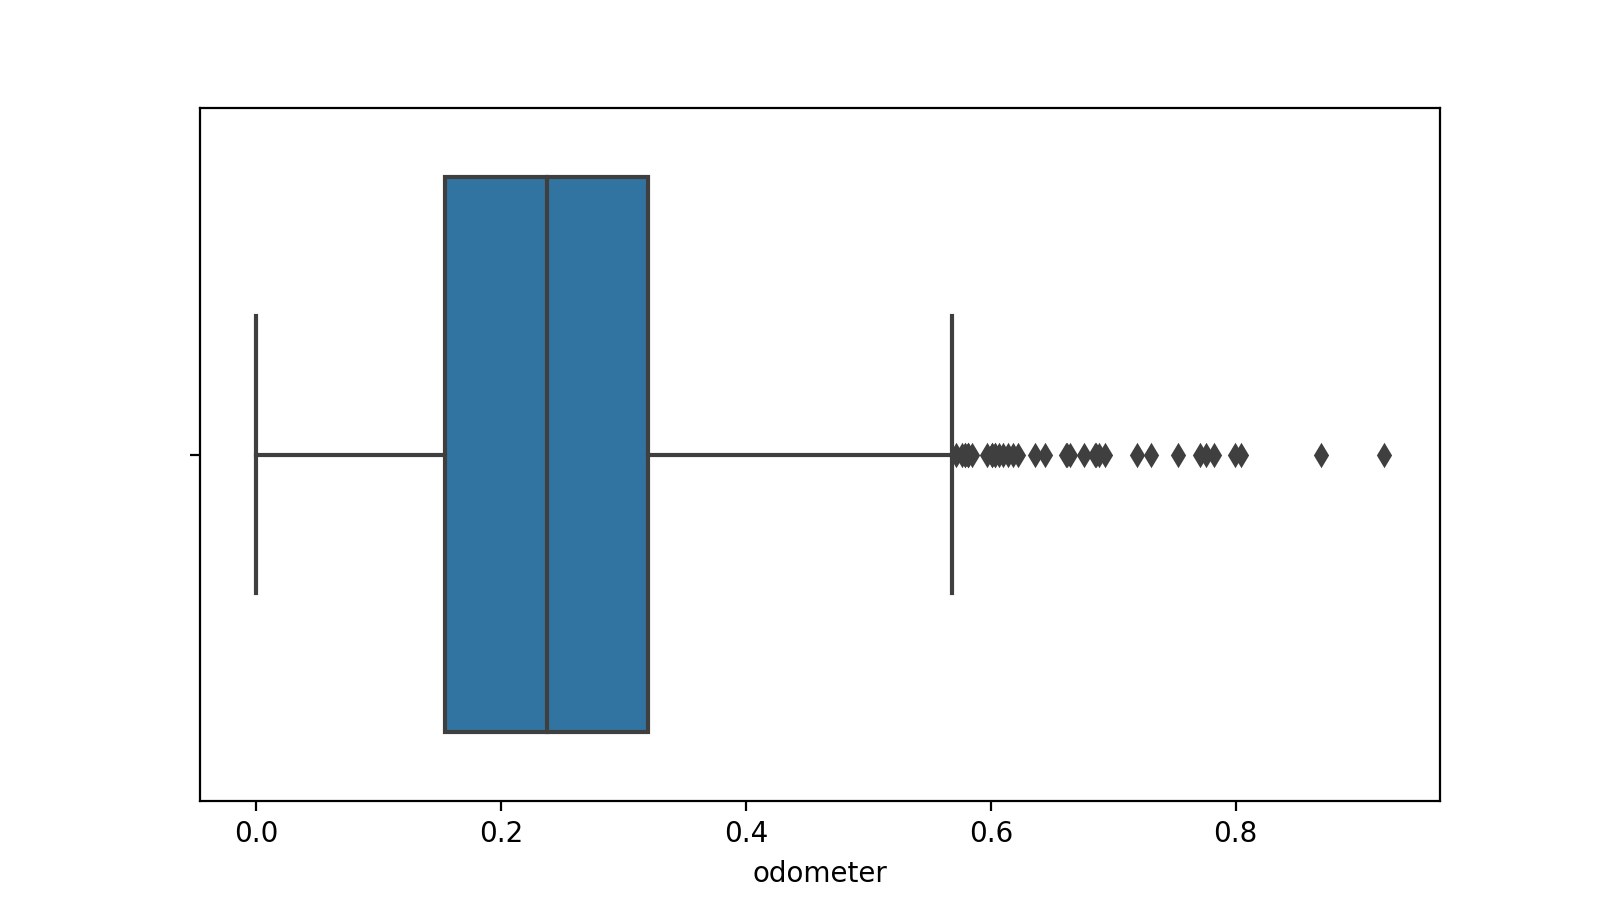

<IPython.core.display.Javascript object>


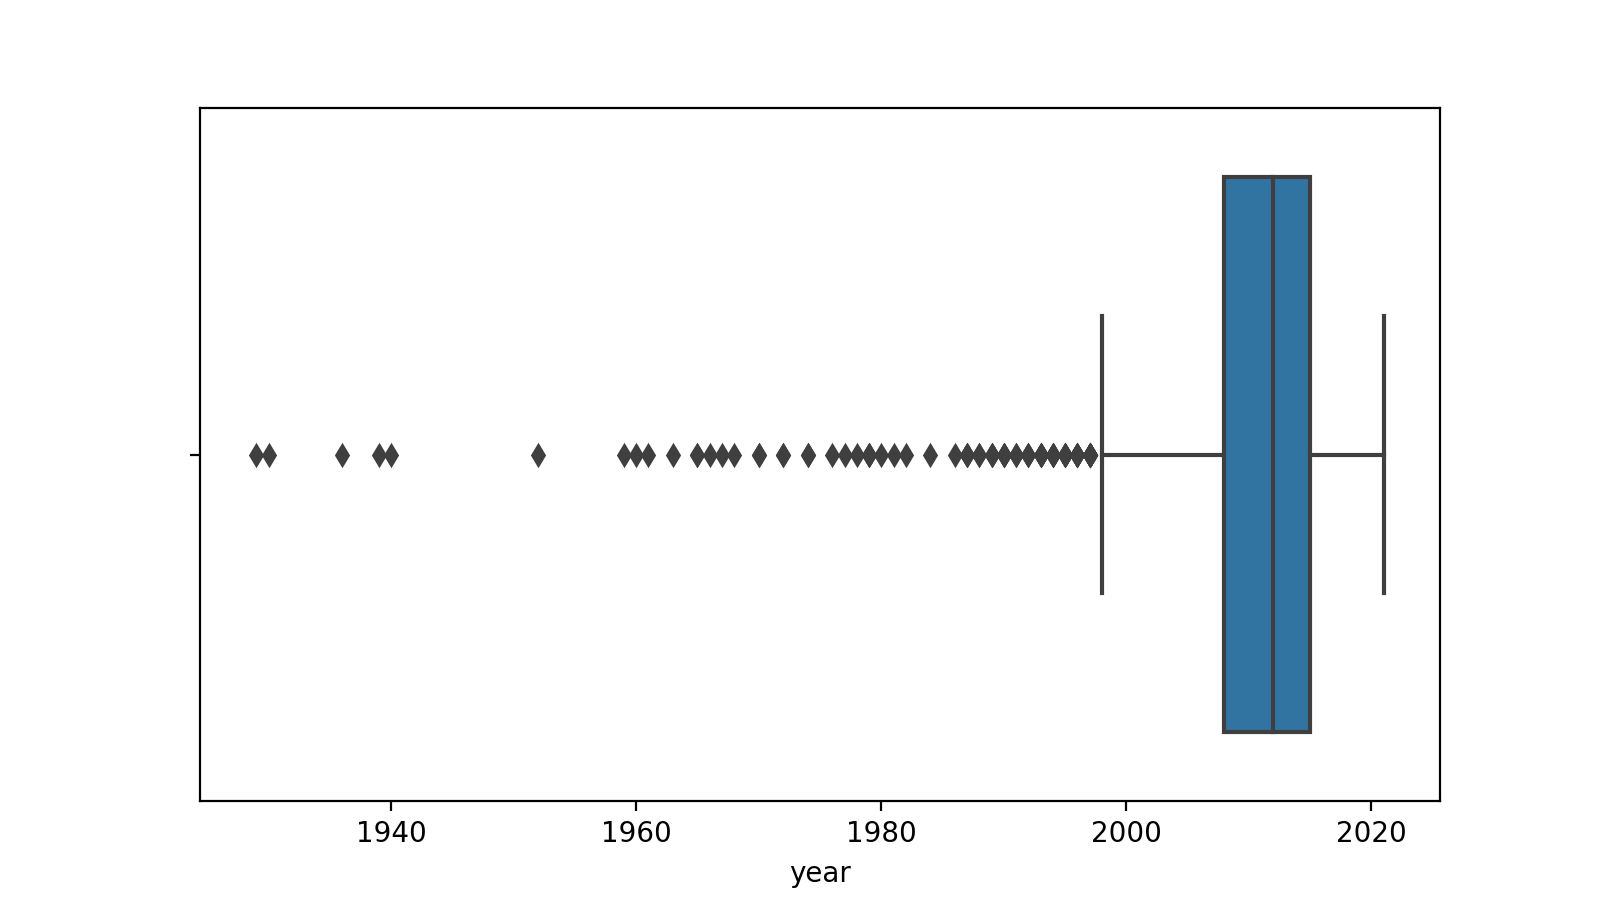

In [47]:
# visualize quantitive data (year and odometer) in box and whisker plot
import seaborn as sns
import matplotlib.pyplot as plt

for feature in selected_features_merged_df.columns[8:10]:
    plt.figure(figsize=(8, 4.5))  
    sns.boxplot(data=sample_df, x = feature)

Boxplot shows 

<IPython.core.display.Javascript object>


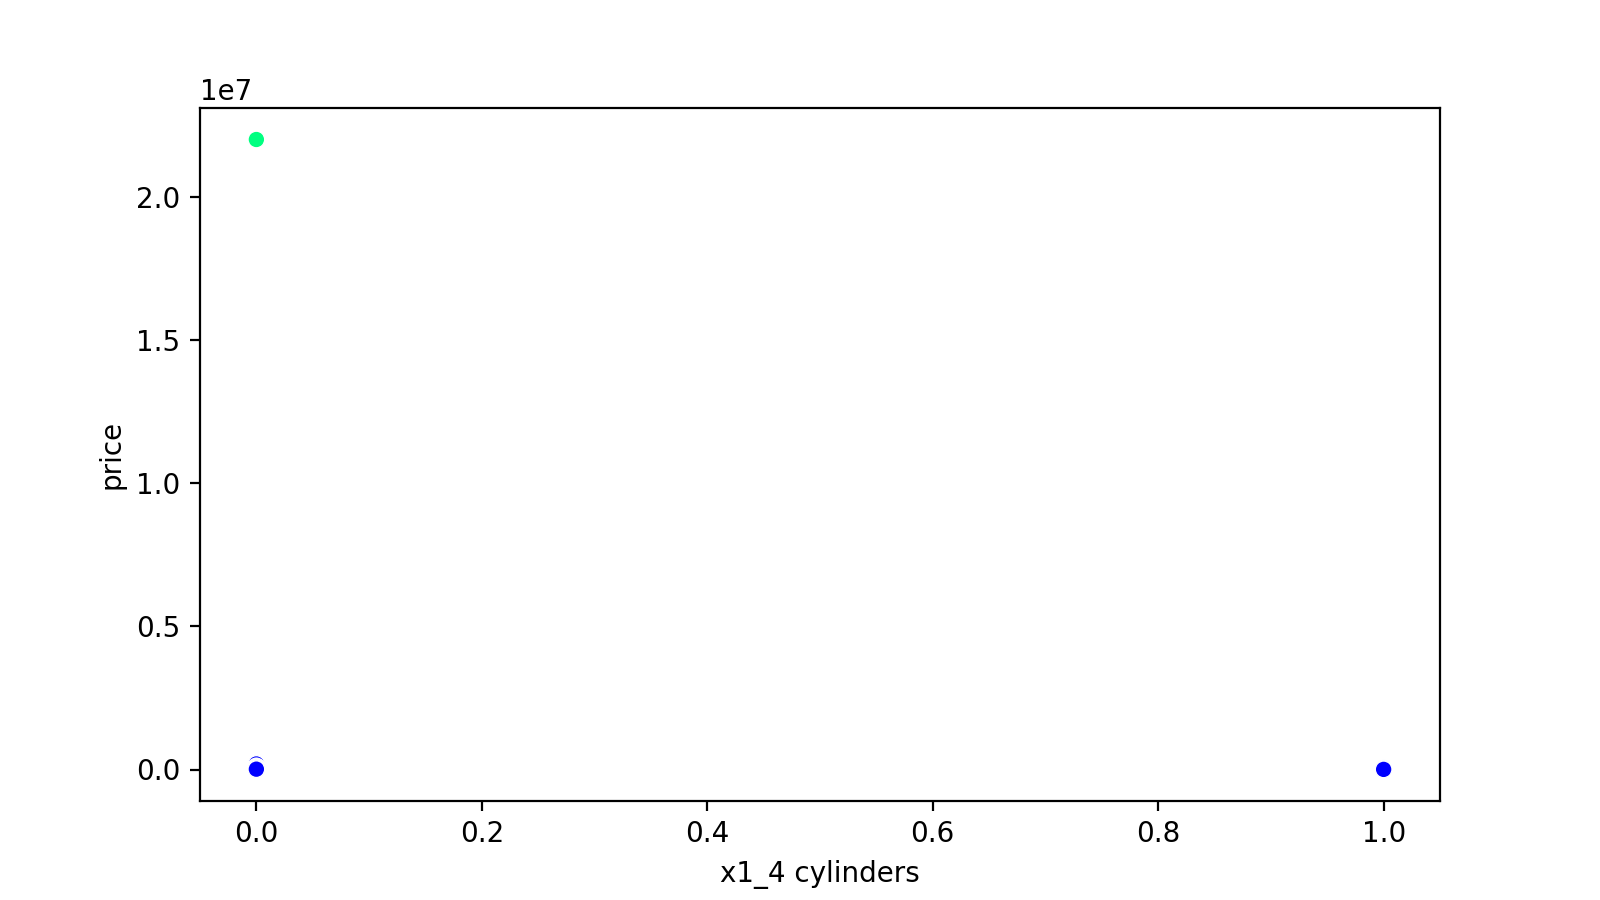

<IPython.core.display.Javascript object>


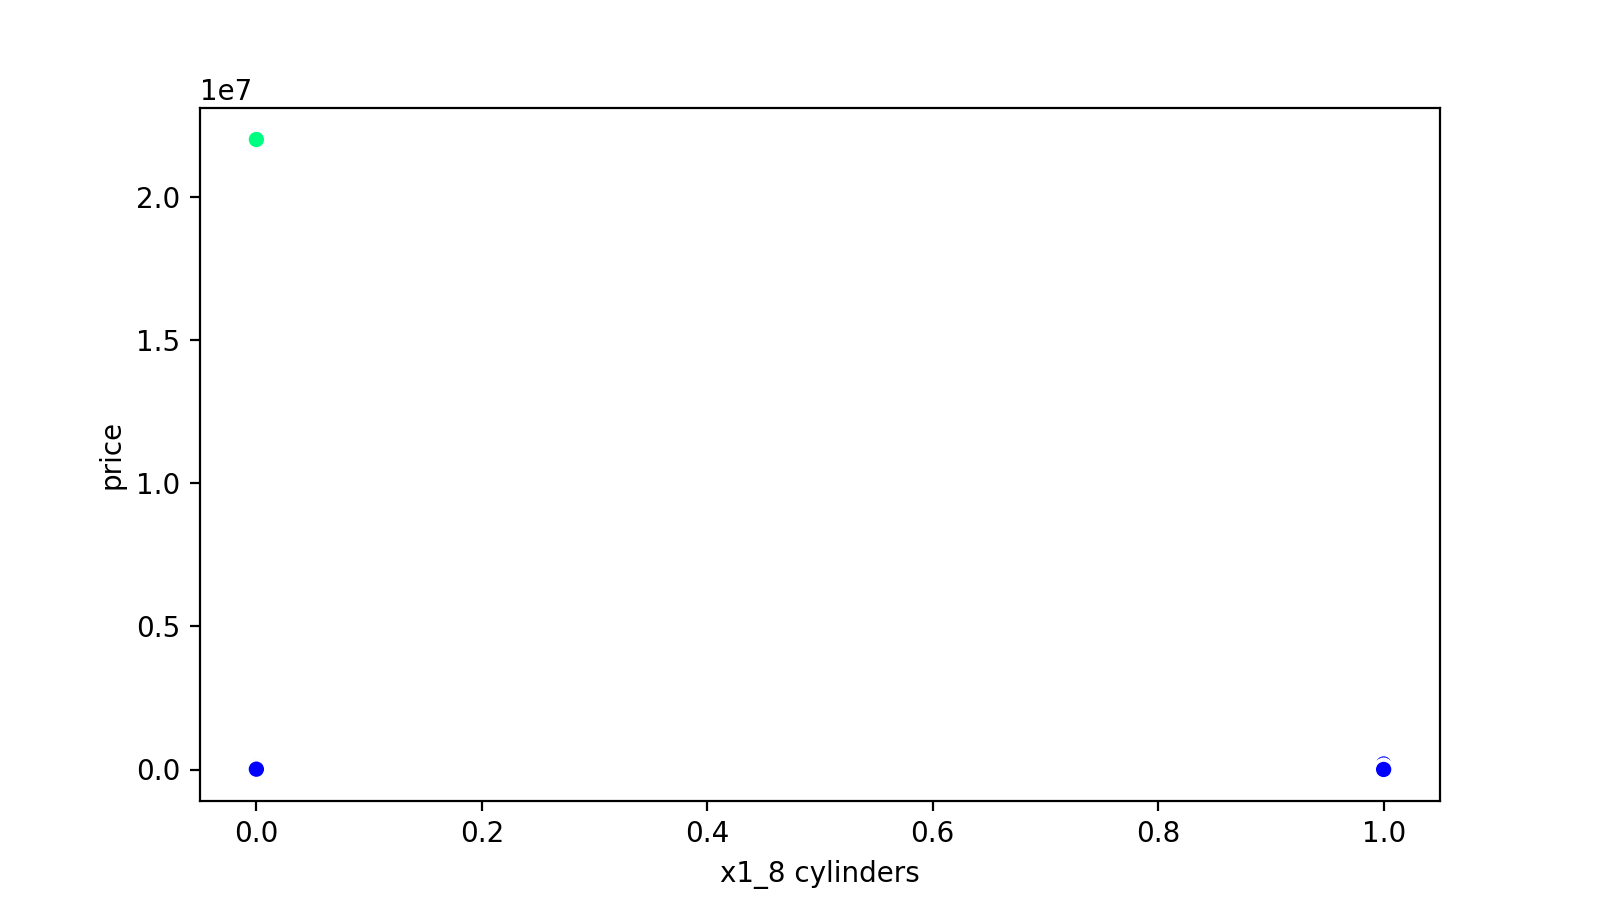

<IPython.core.display.Javascript object>


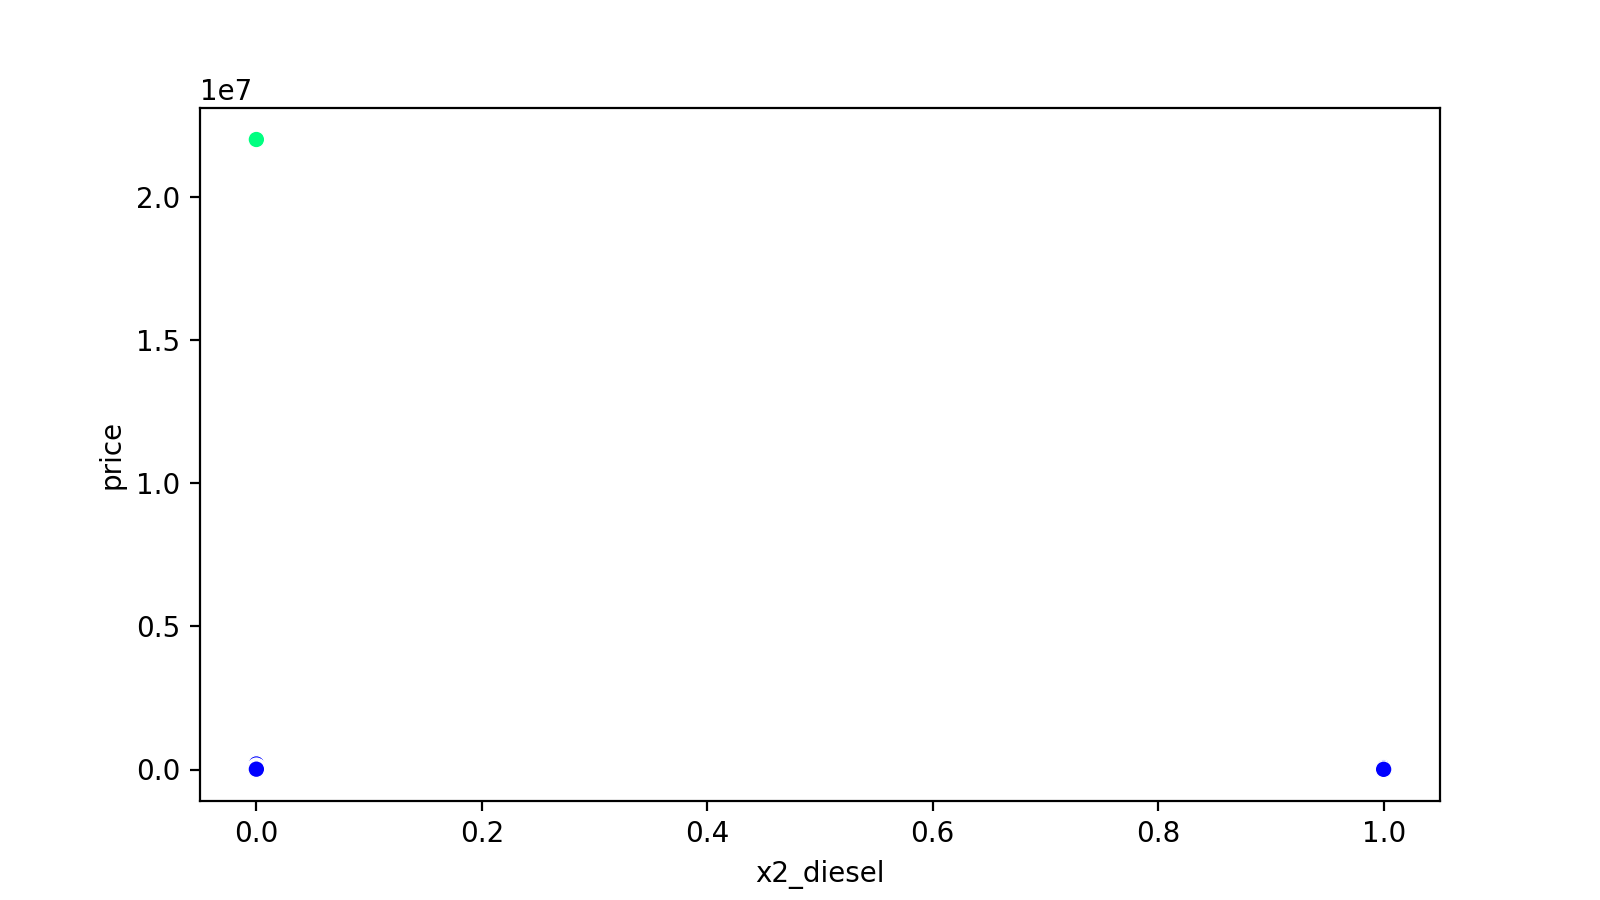

<IPython.core.display.Javascript object>


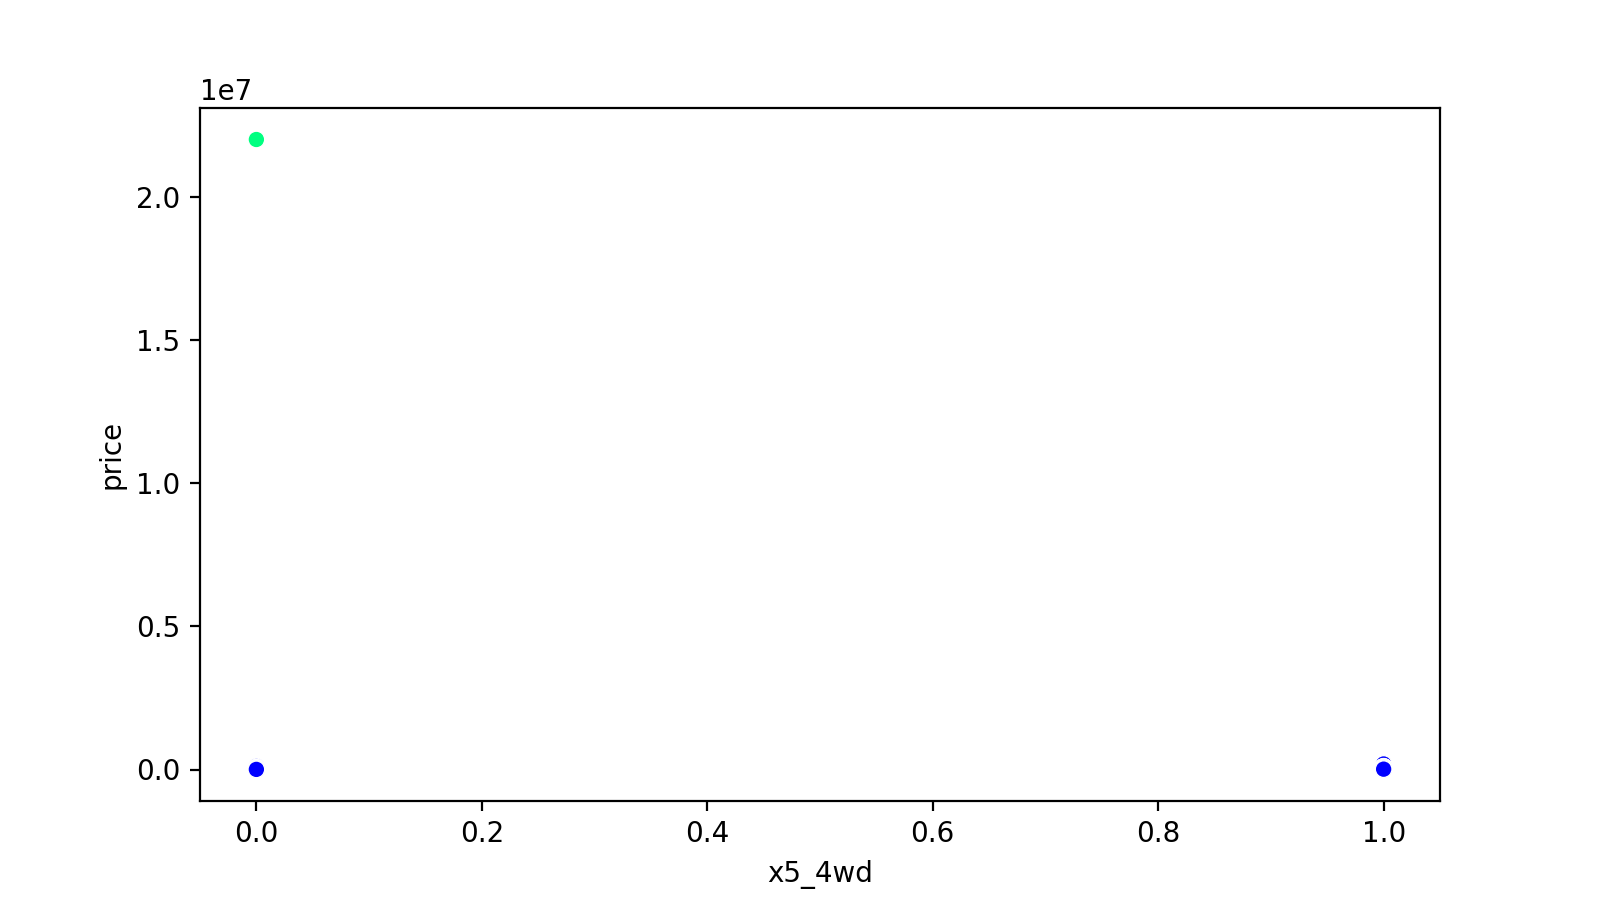

<IPython.core.display.Javascript object>


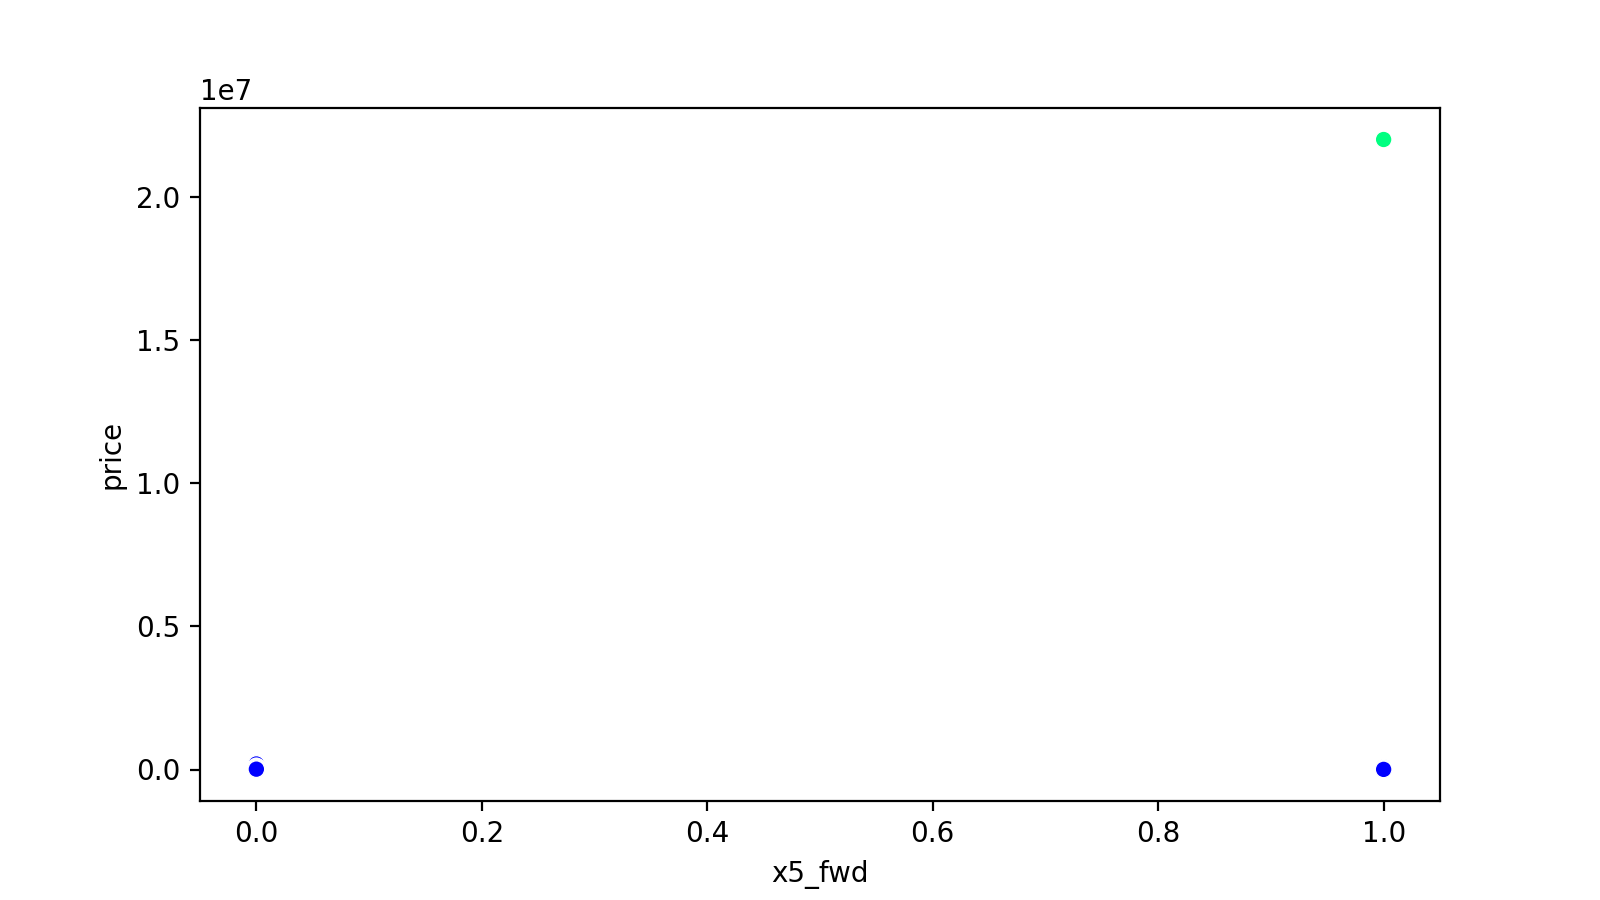

<IPython.core.display.Javascript object>


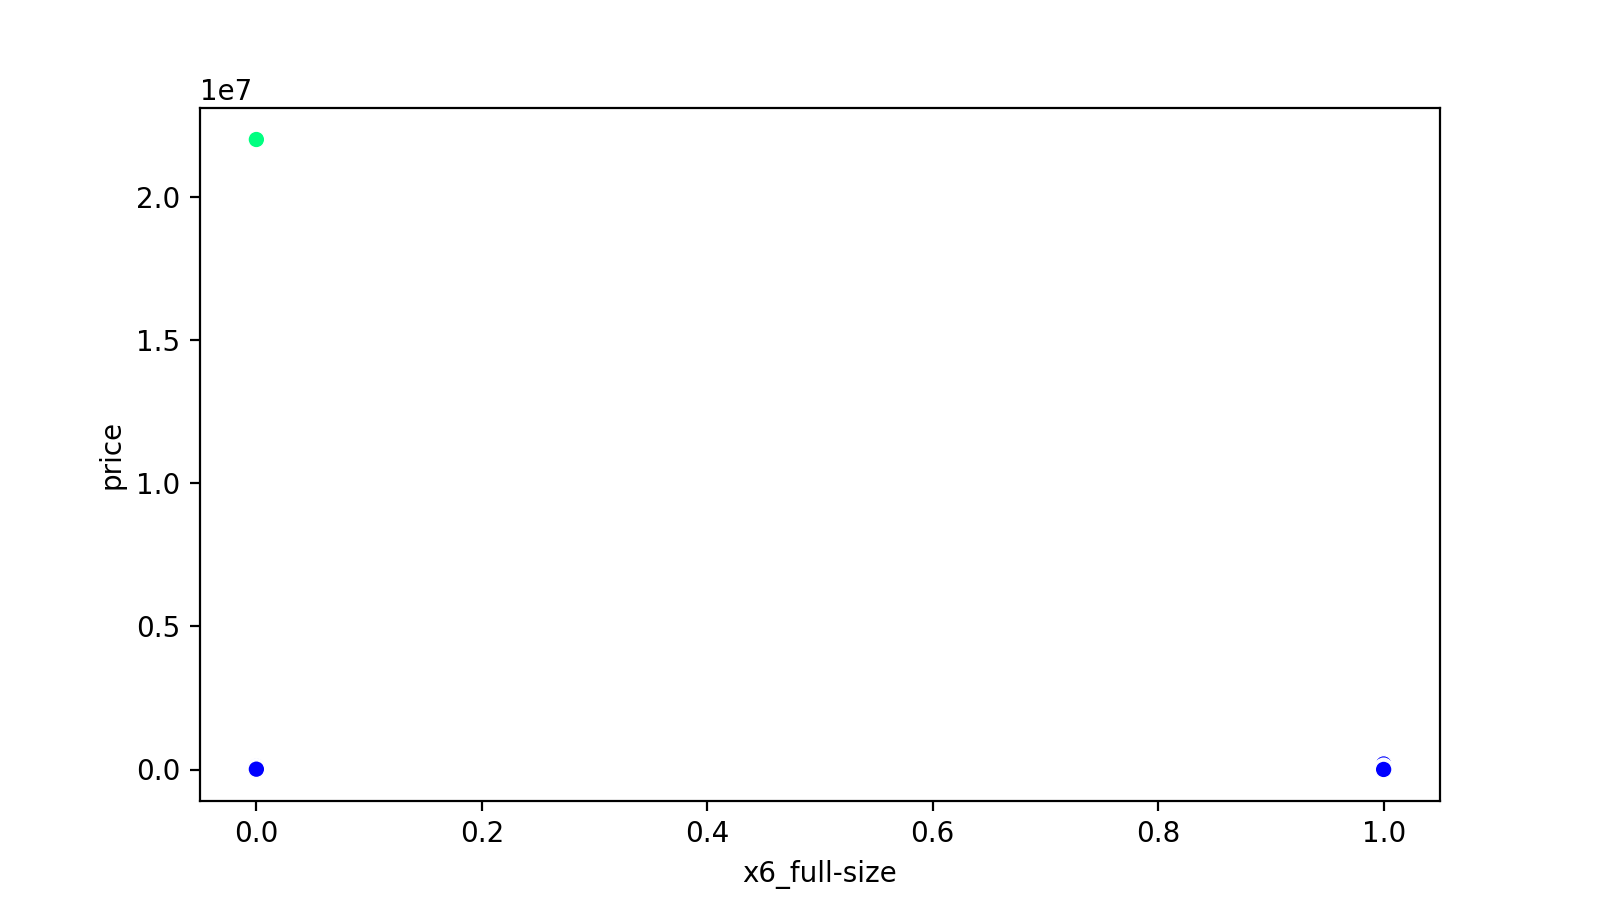

<IPython.core.display.Javascript object>


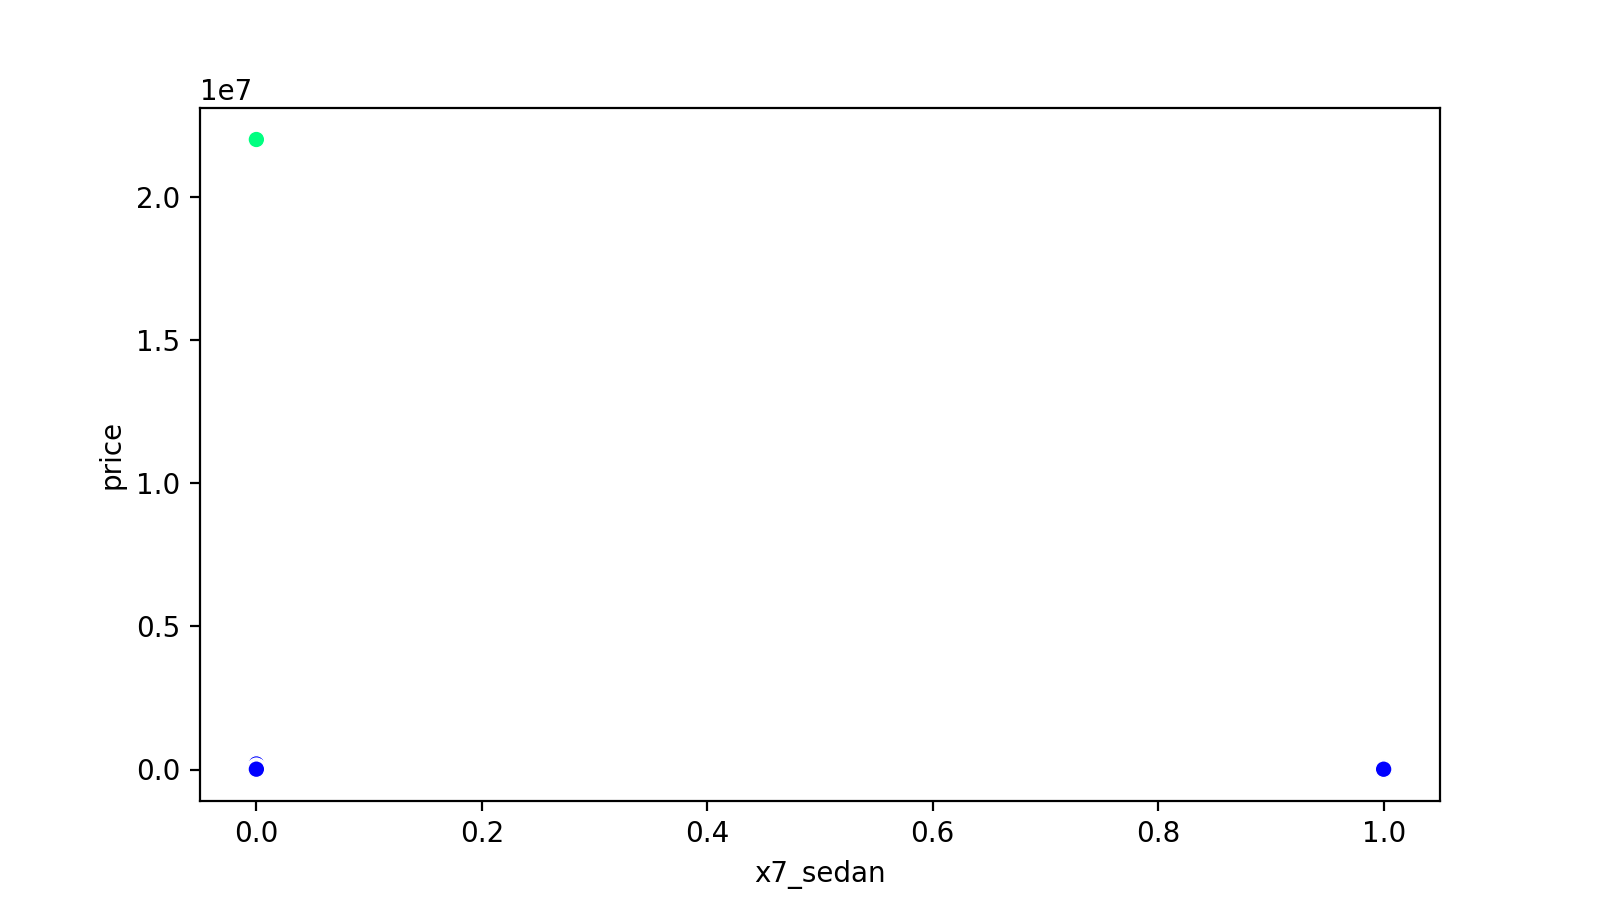

<IPython.core.display.Javascript object>


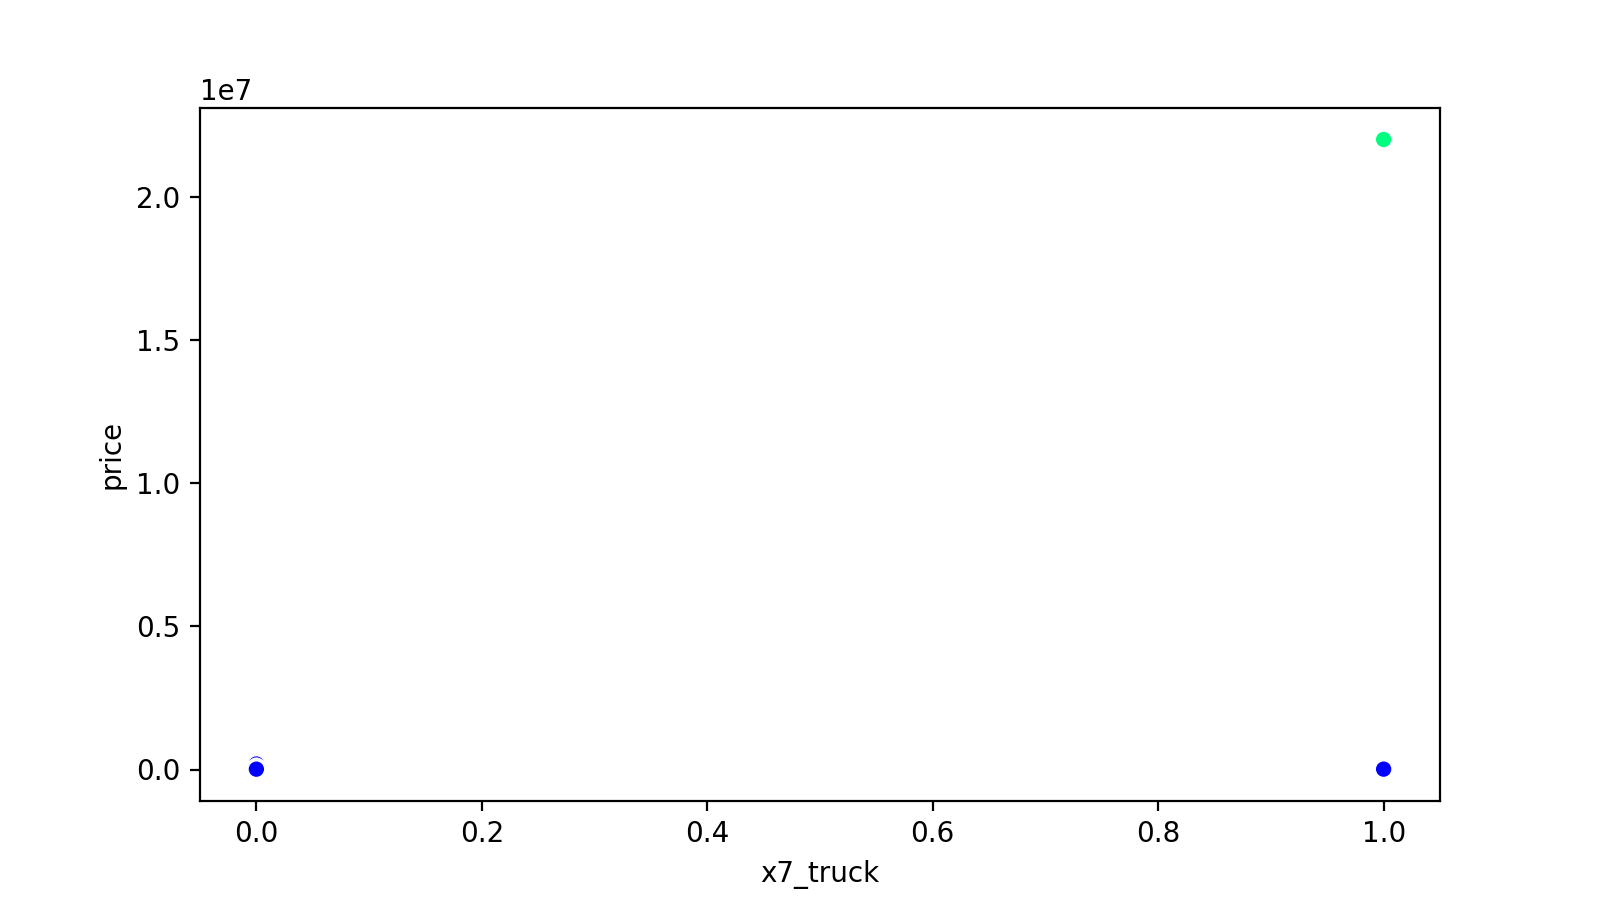

<IPython.core.display.Javascript object>


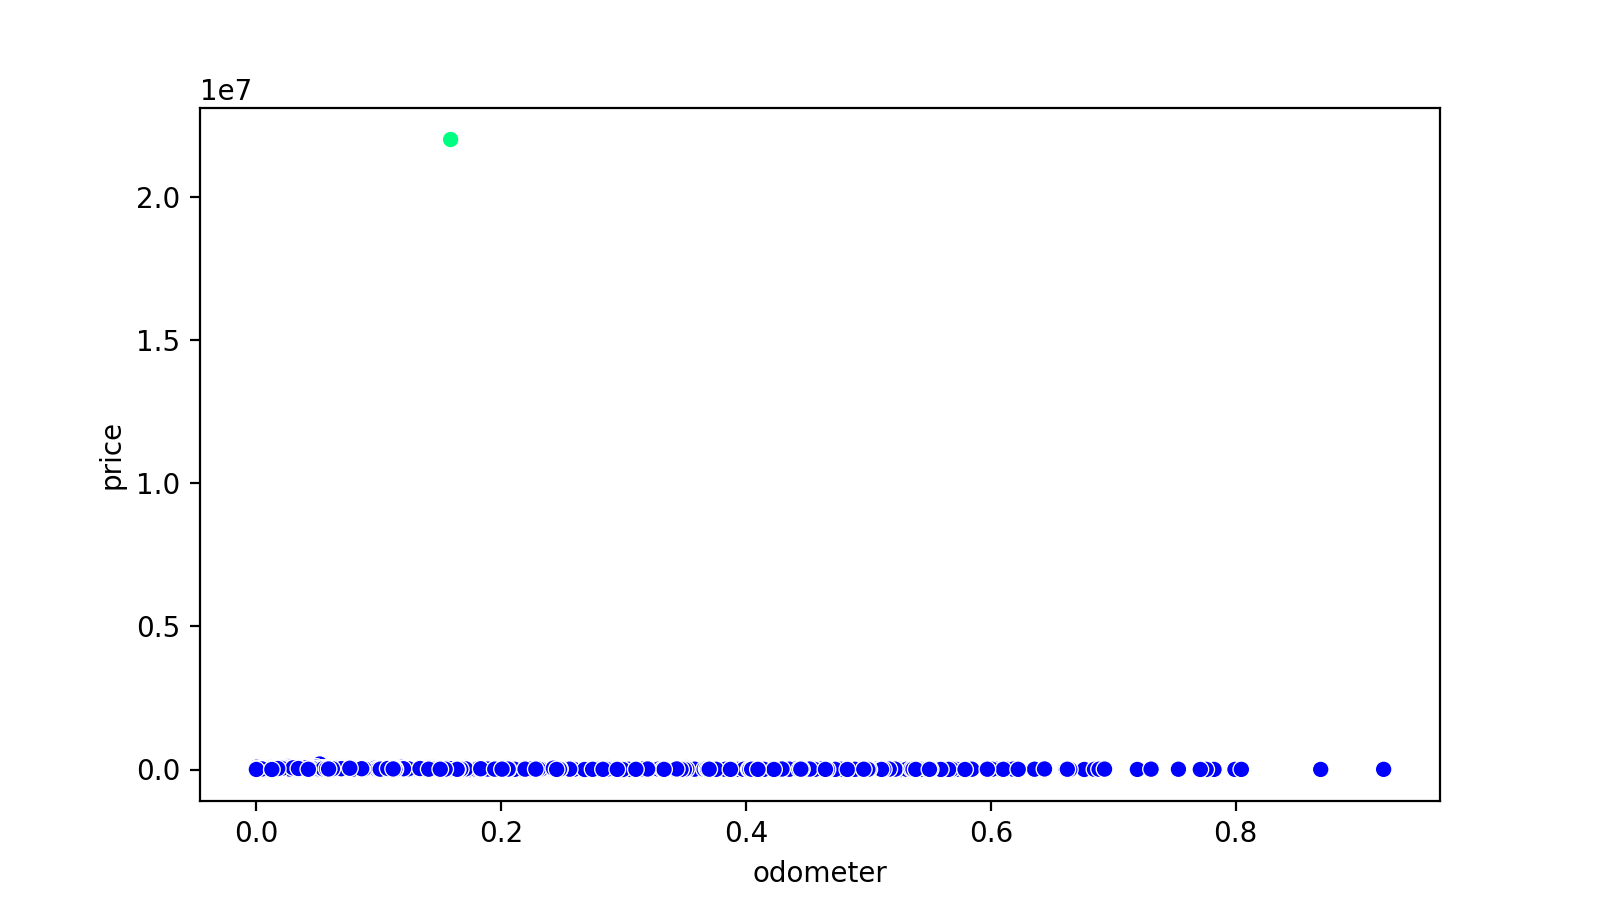

<IPython.core.display.Javascript object>


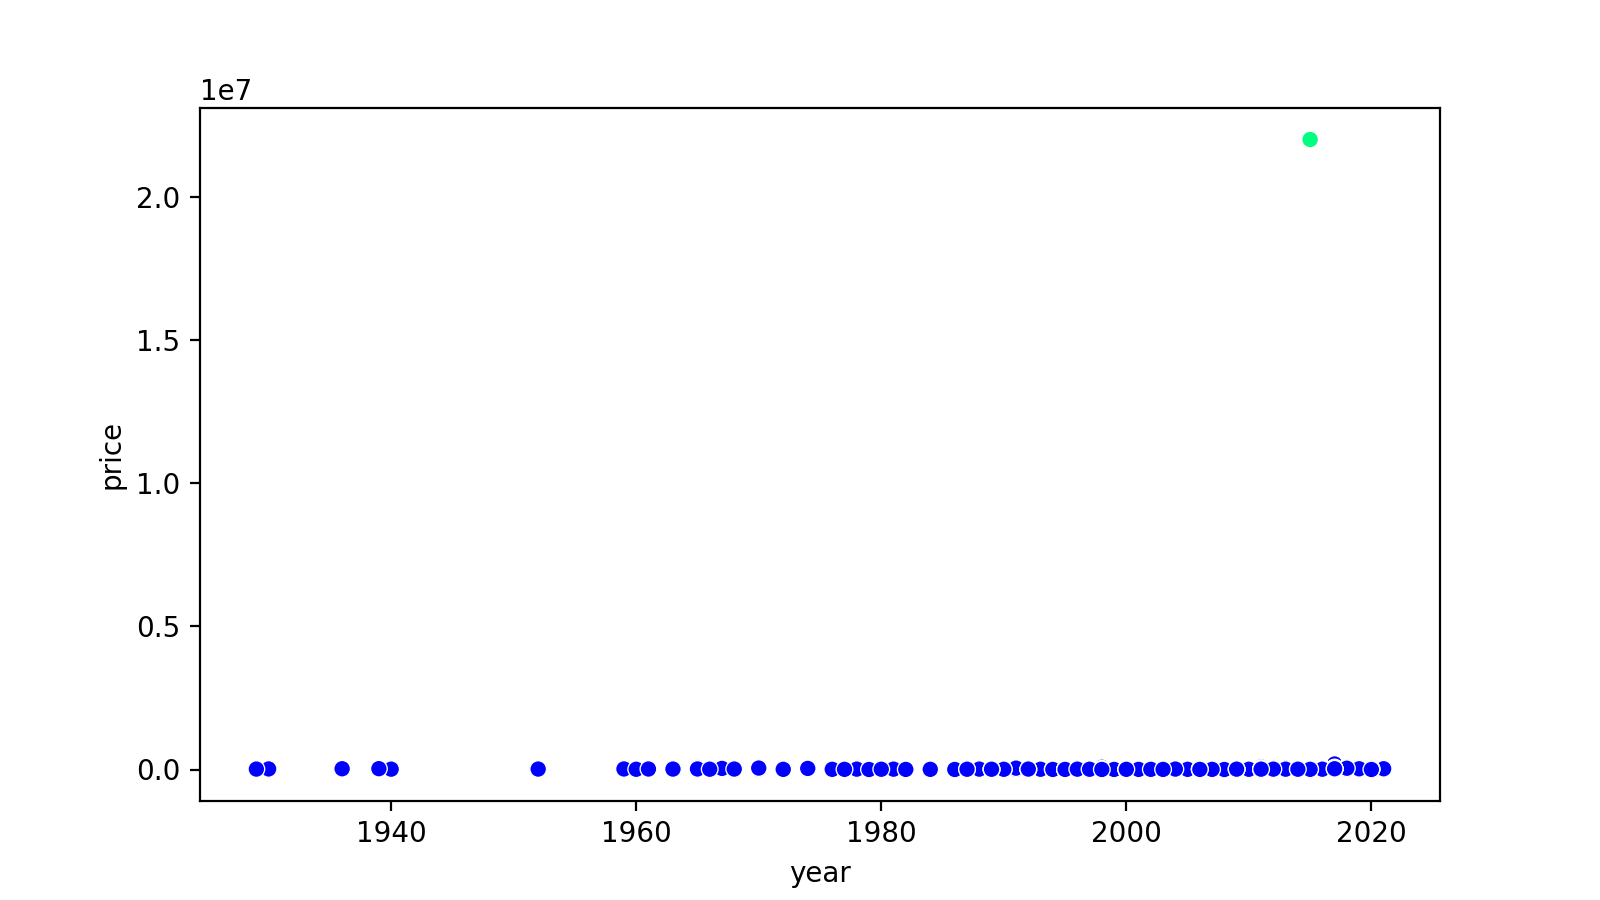

In [48]:
# visualize all features against the target variable
for feature in selected_features_merged_df.columns[0:10]:
    plt.figure(figsize=(8, 4.5))  
    sns.scatterplot(data=sample_df, x=feature, y='price', hue='price', palette='winter', legend=False)

<IPython.core.display.Javascript object>


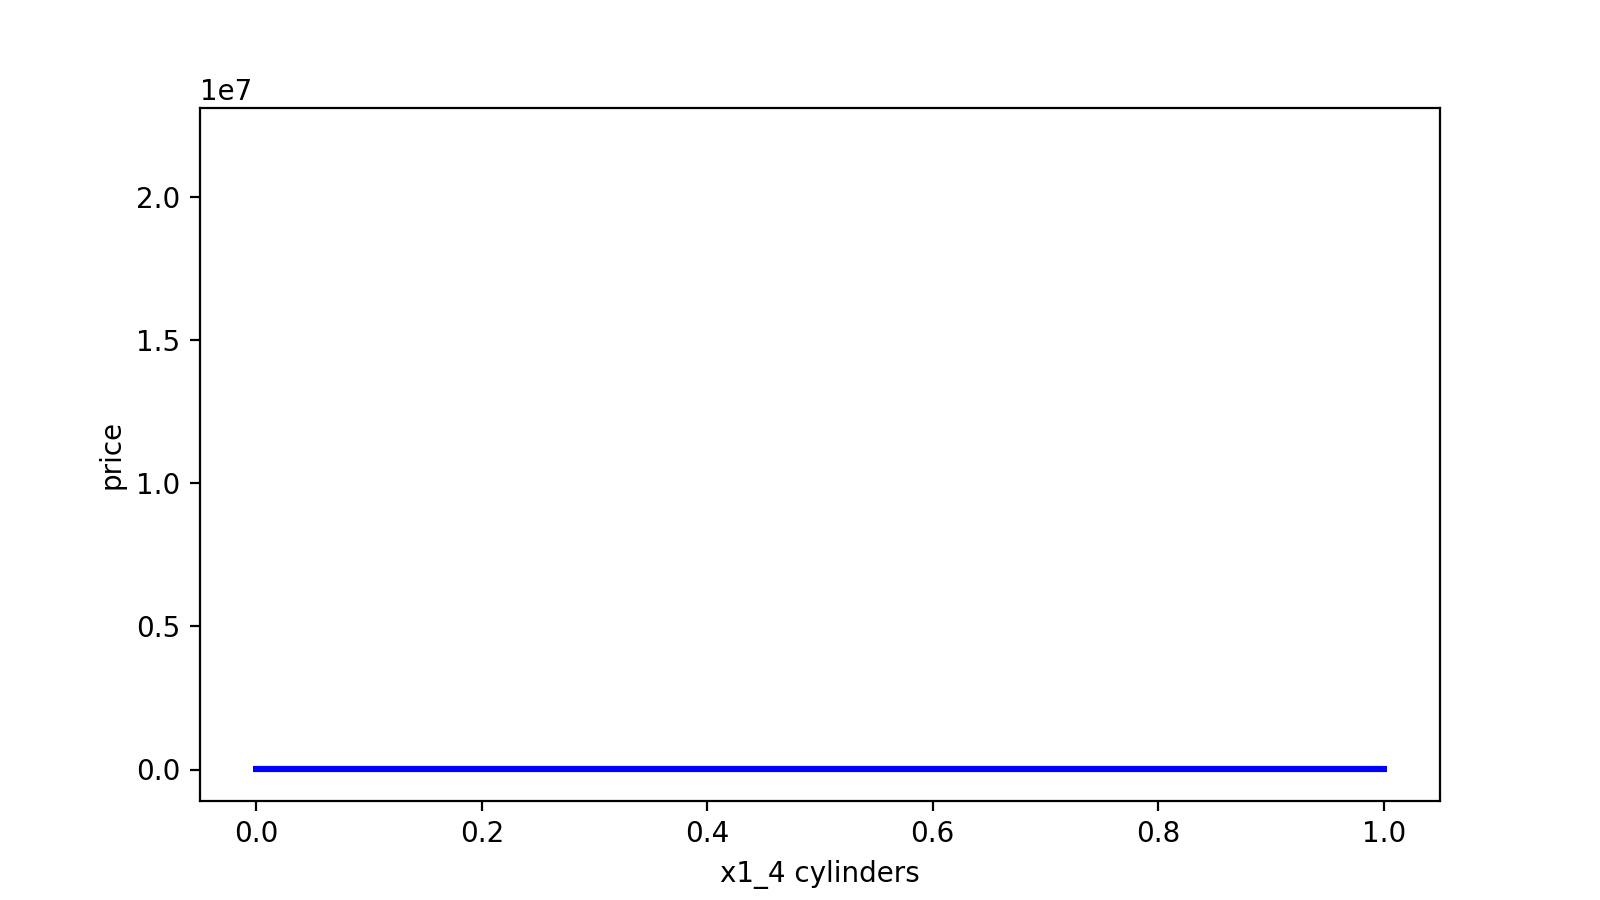

<IPython.core.display.Javascript object>


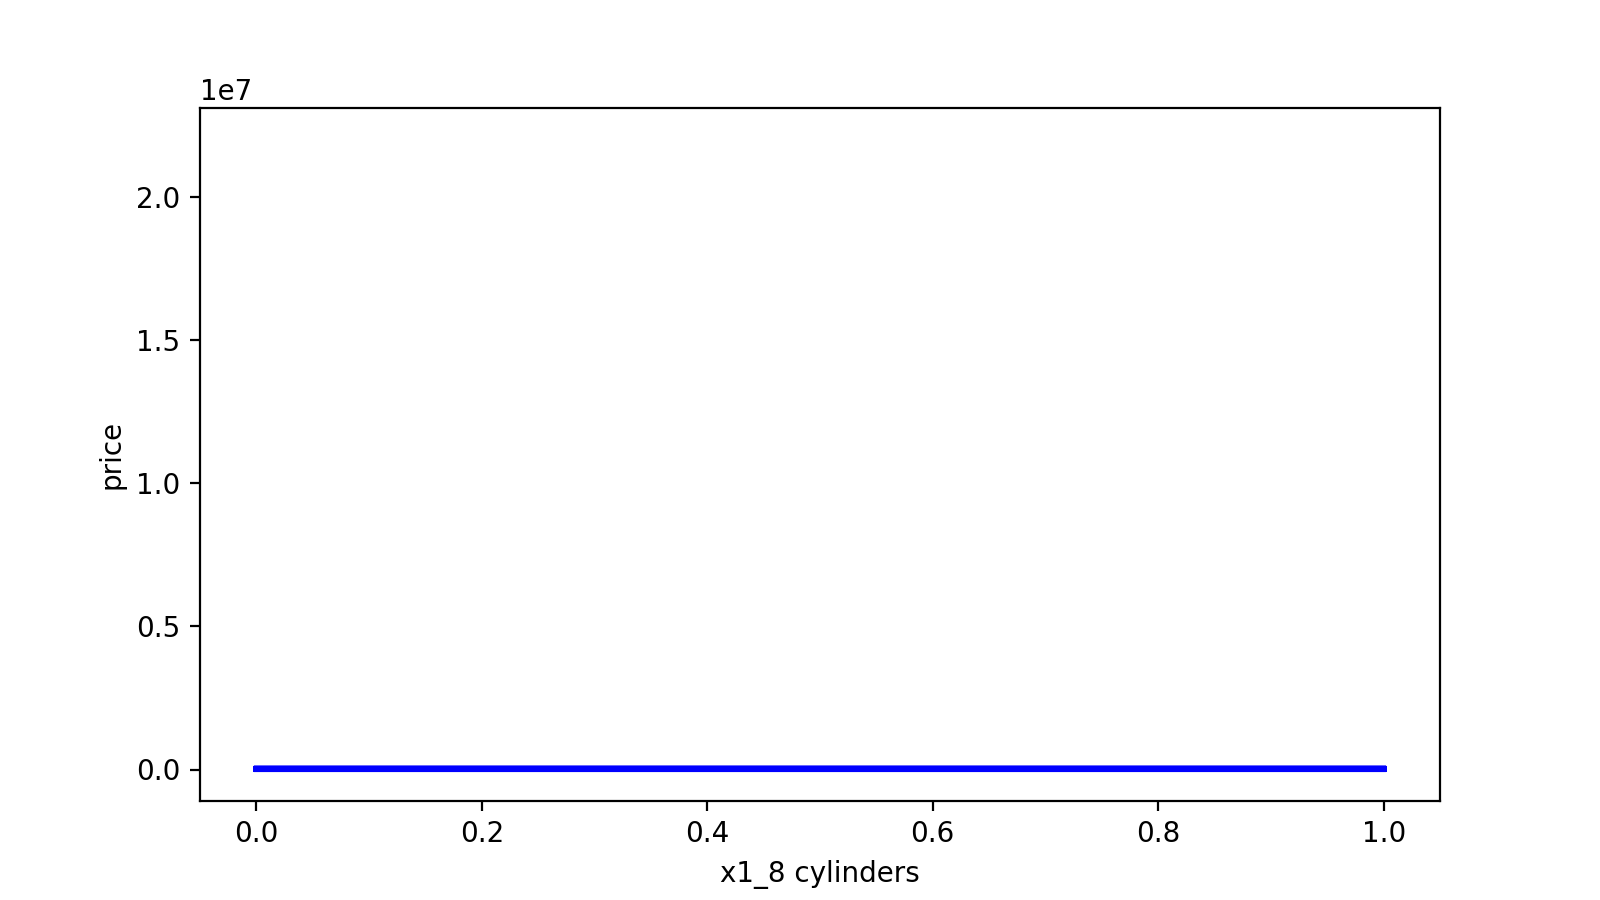

<IPython.core.display.Javascript object>


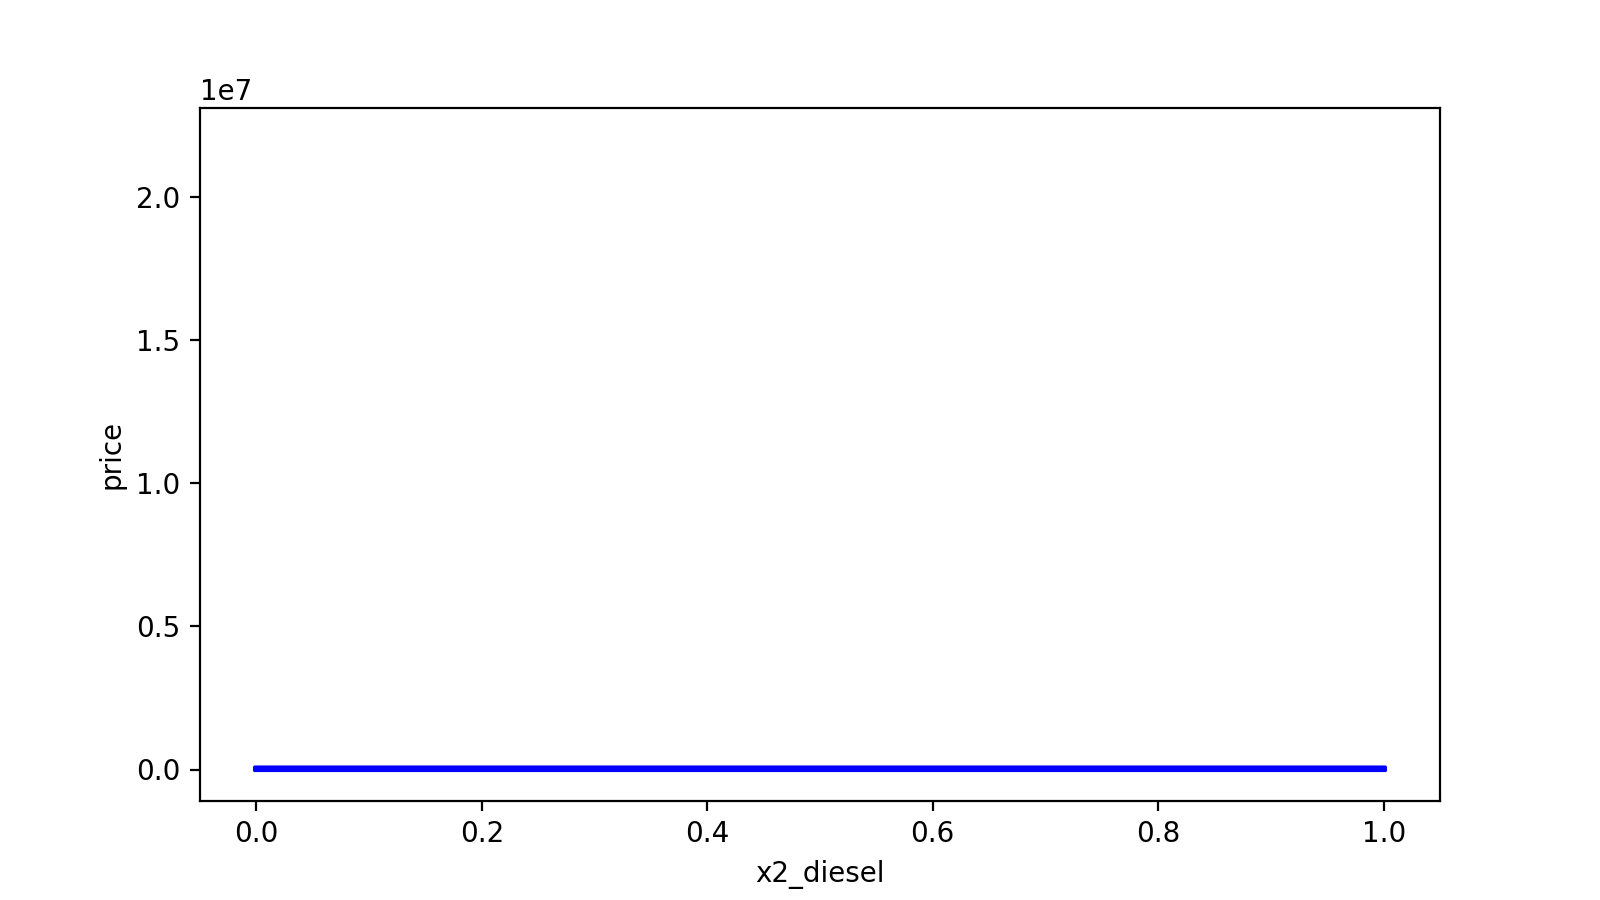

<IPython.core.display.Javascript object>


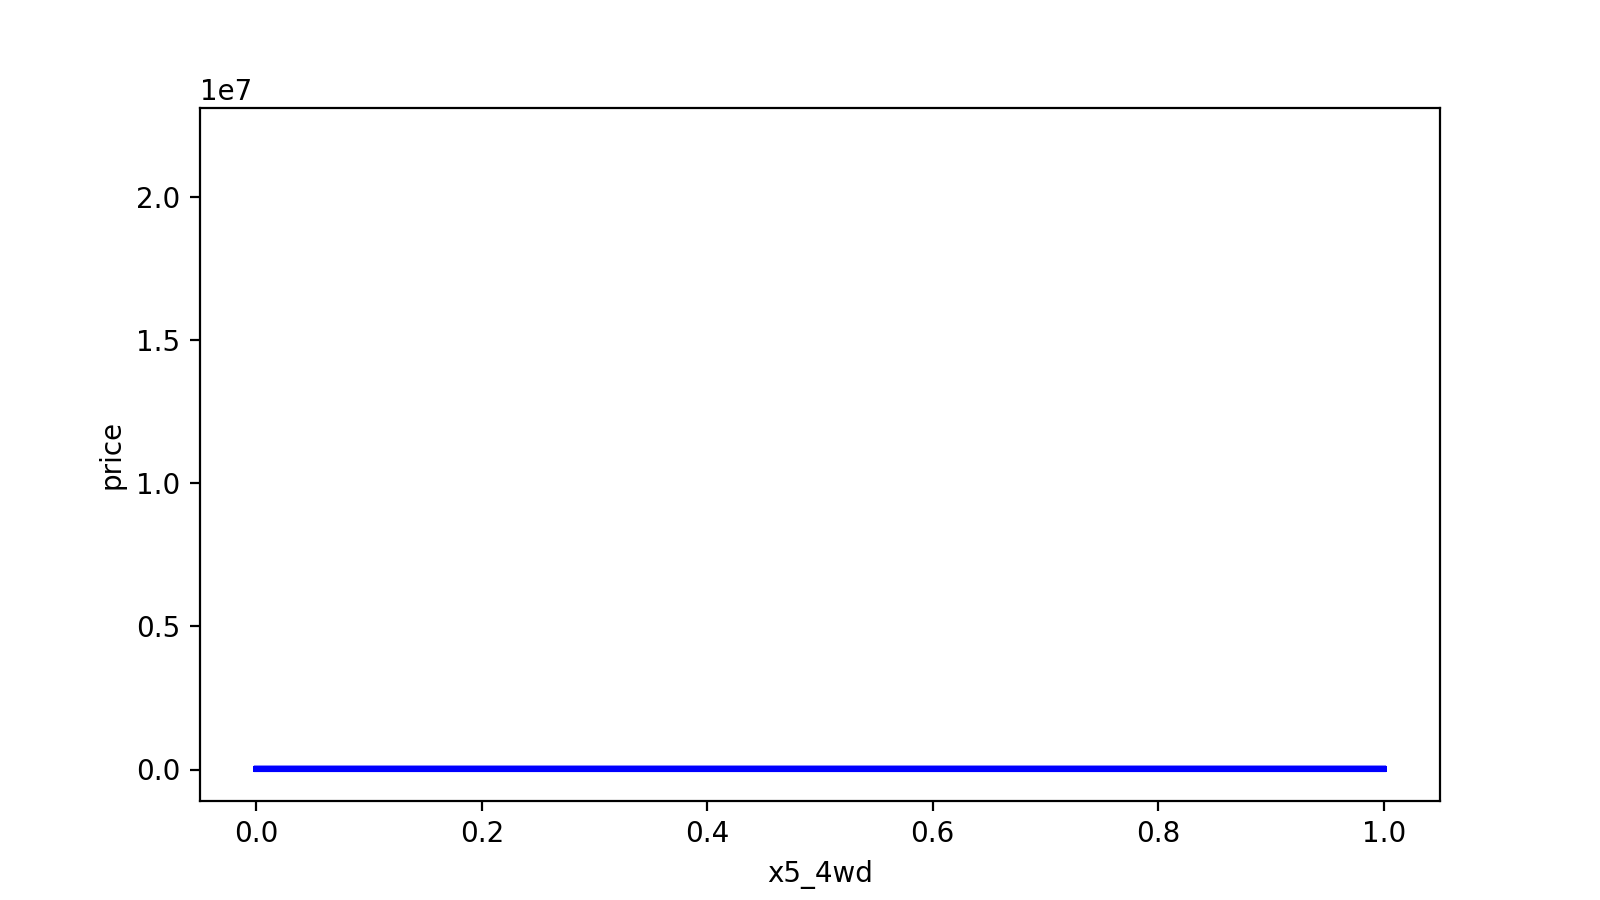

<IPython.core.display.Javascript object>


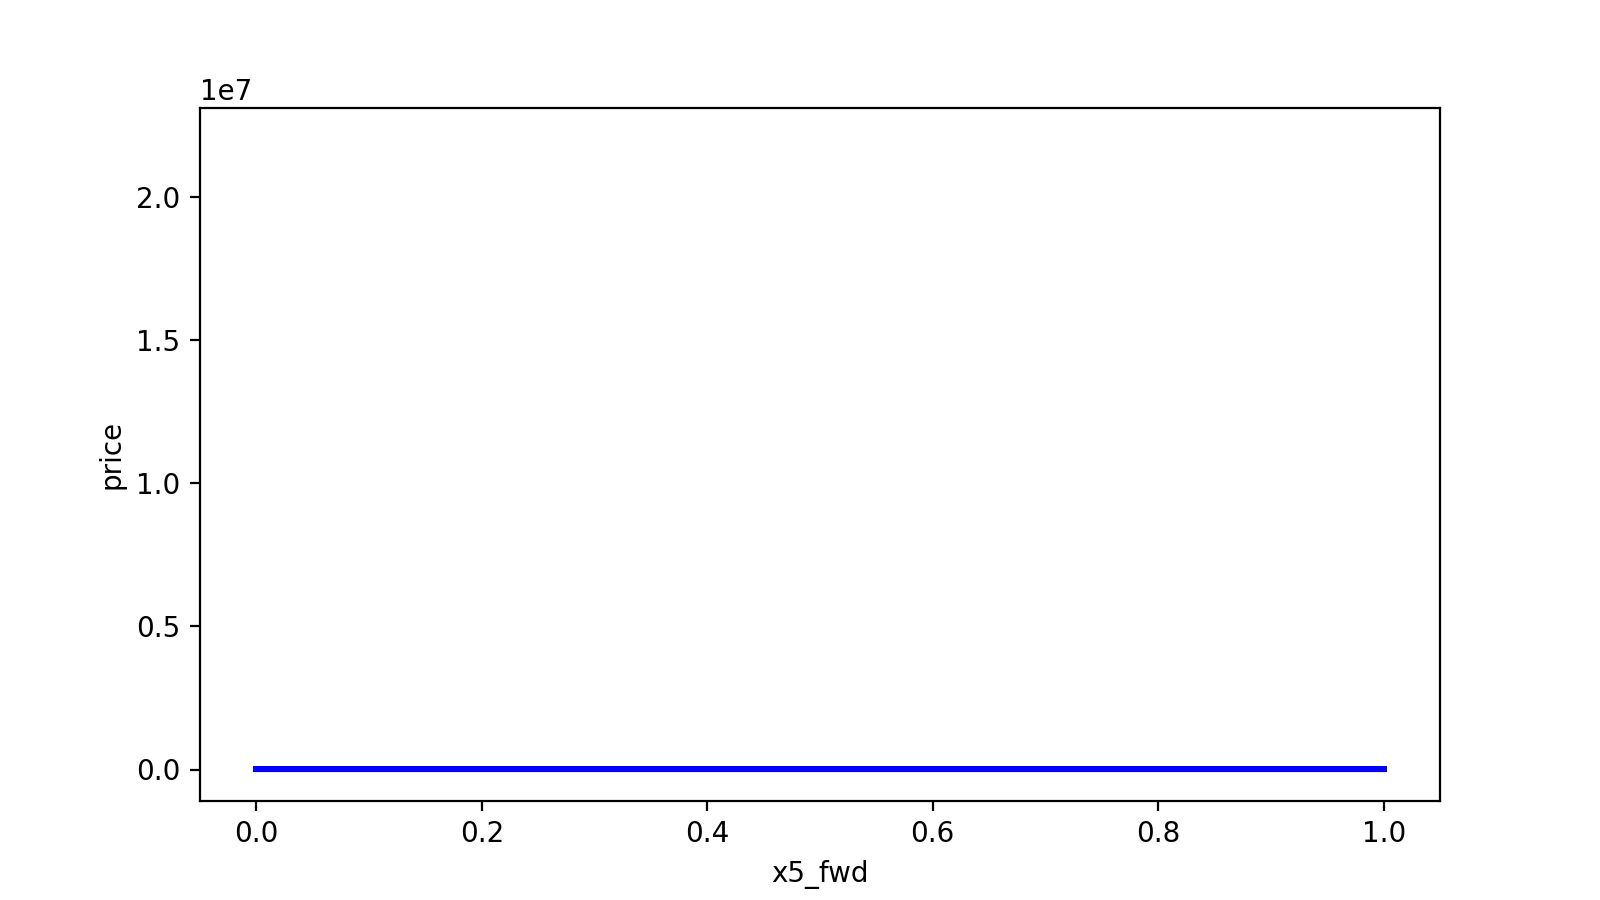

<IPython.core.display.Javascript object>


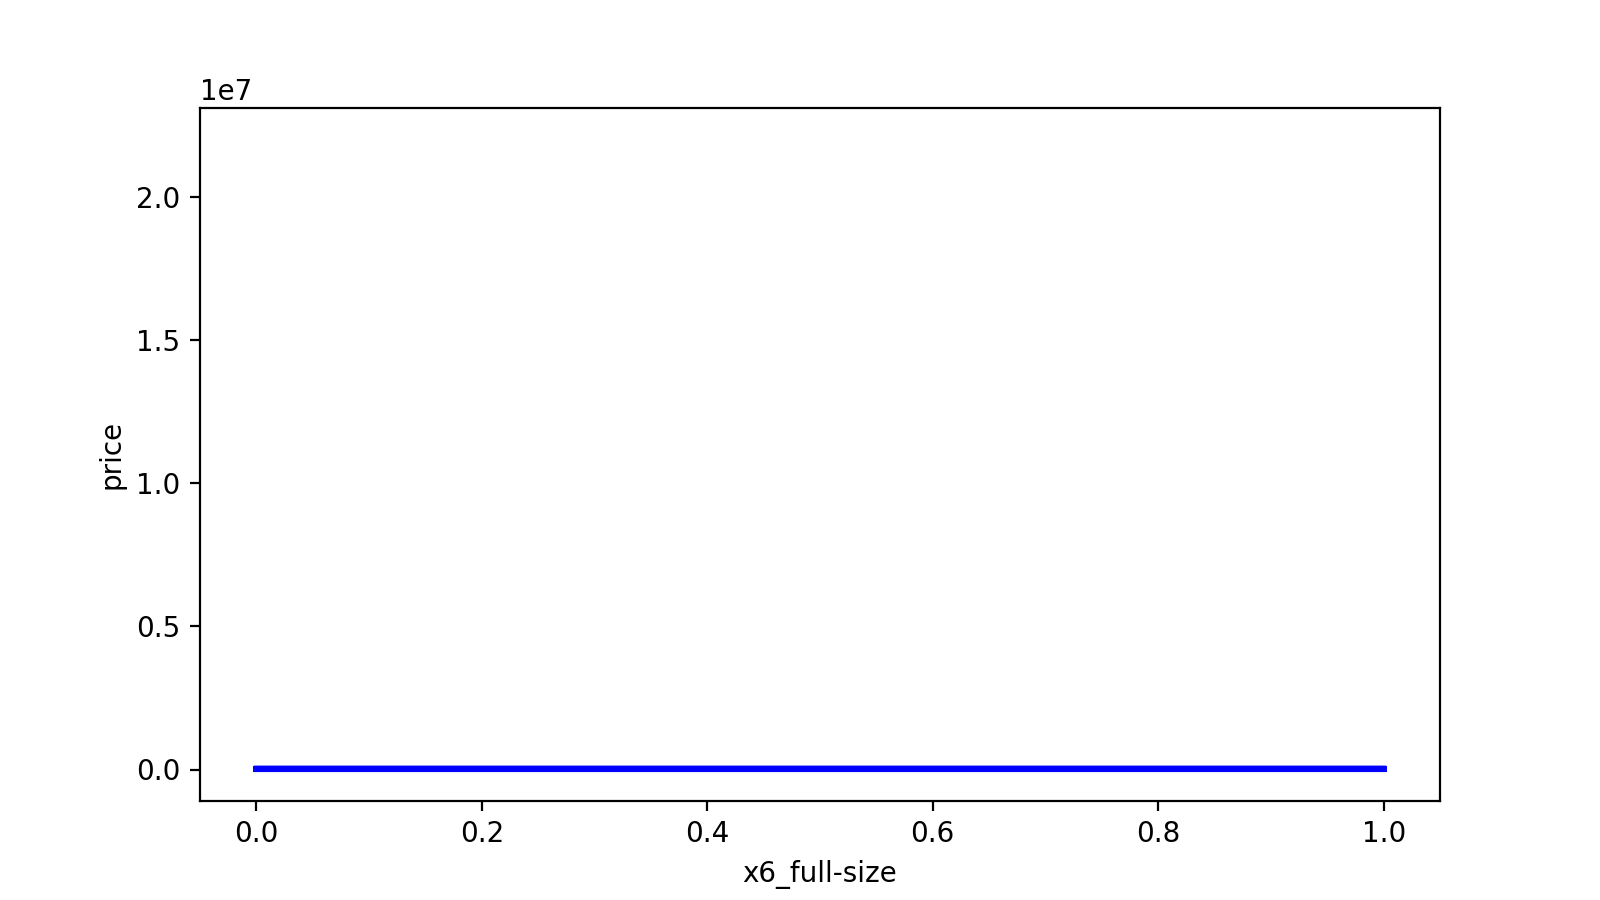

<IPython.core.display.Javascript object>


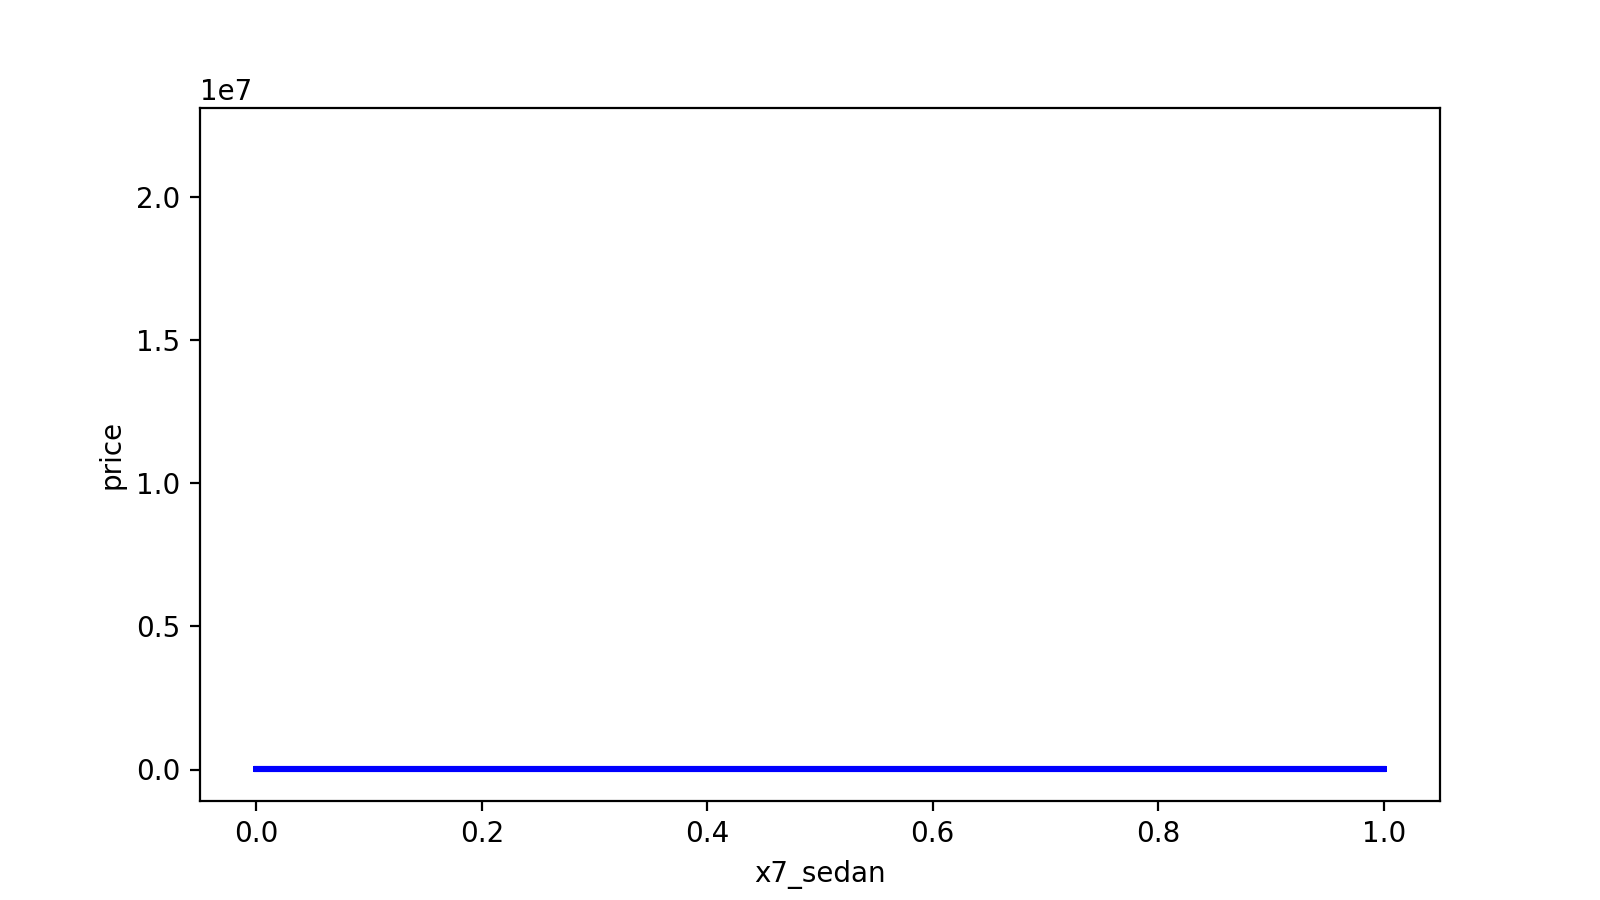

<IPython.core.display.Javascript object>


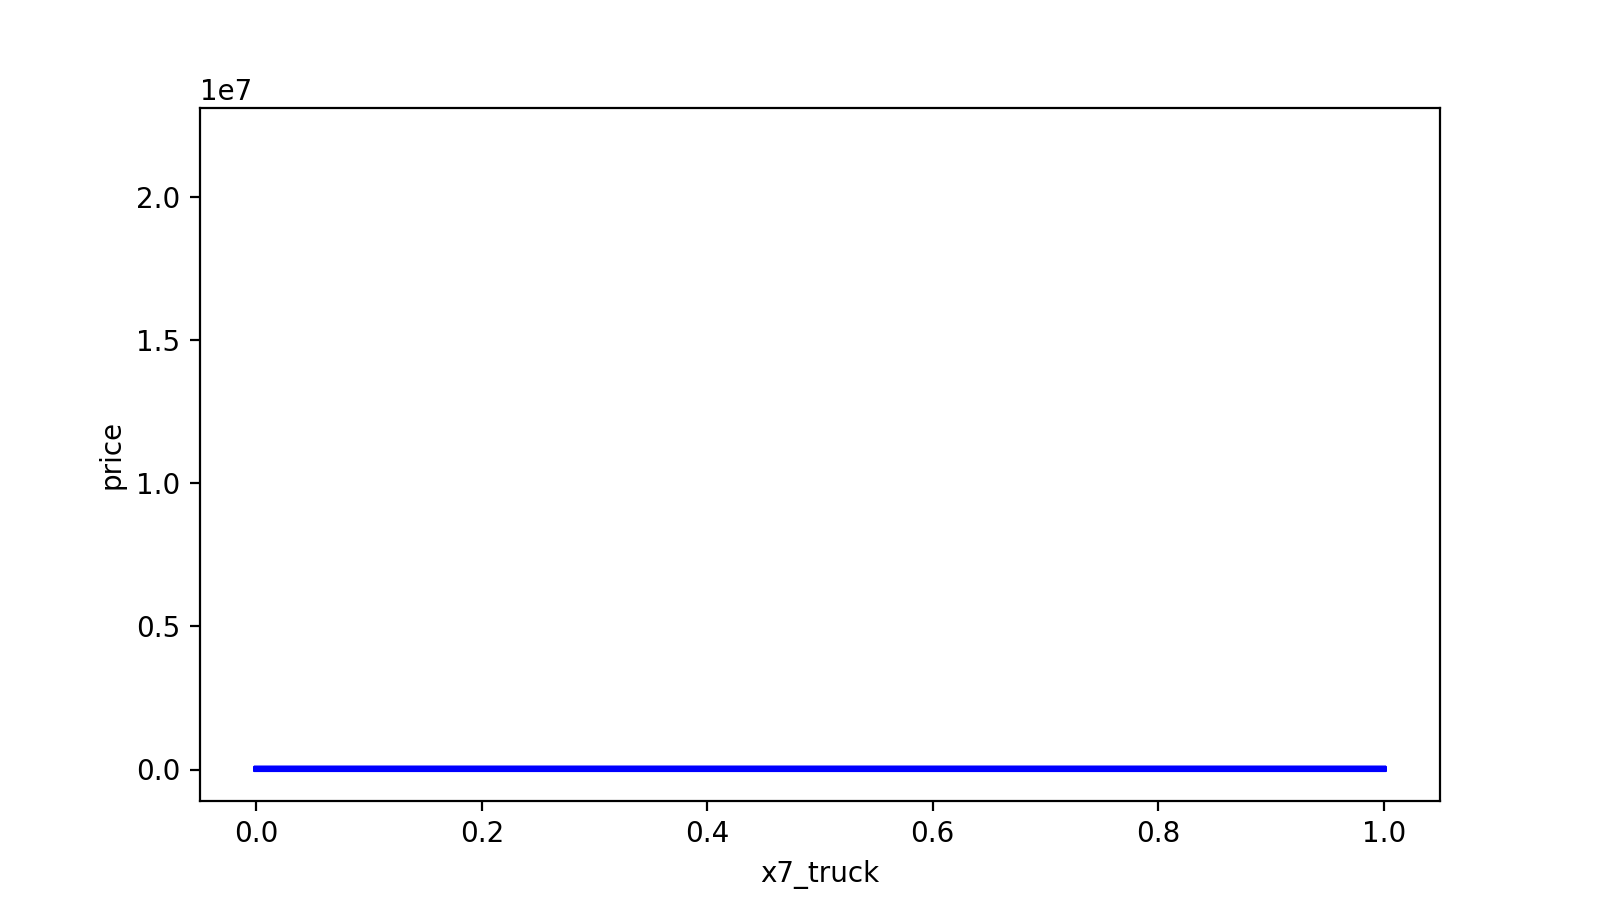

/Users/runqinghu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


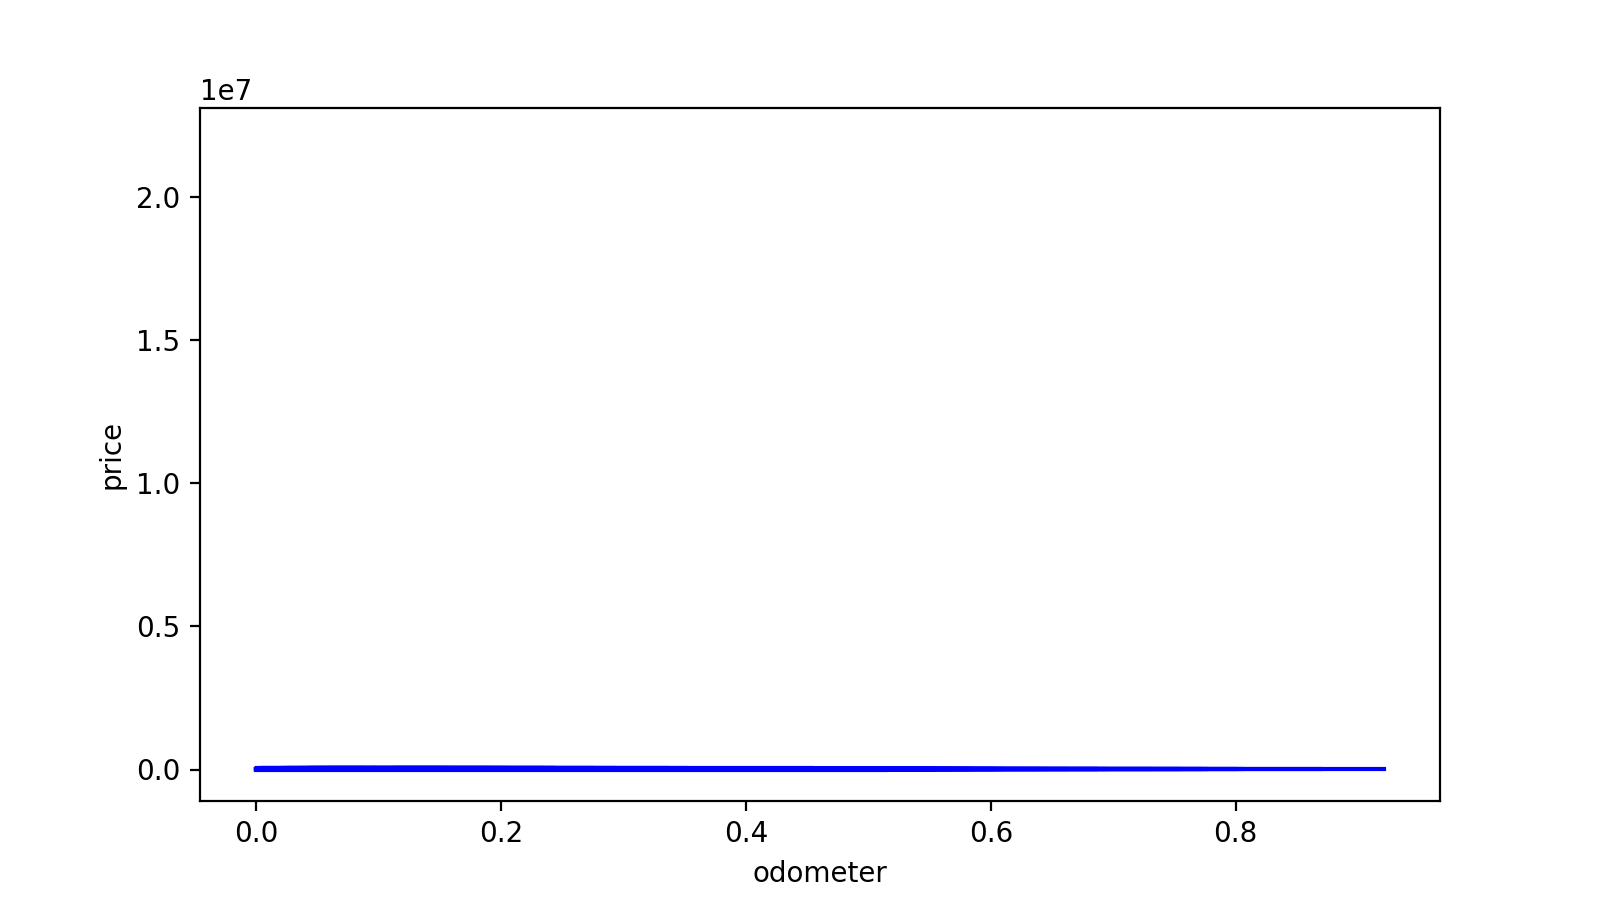

<IPython.core.display.Javascript object>


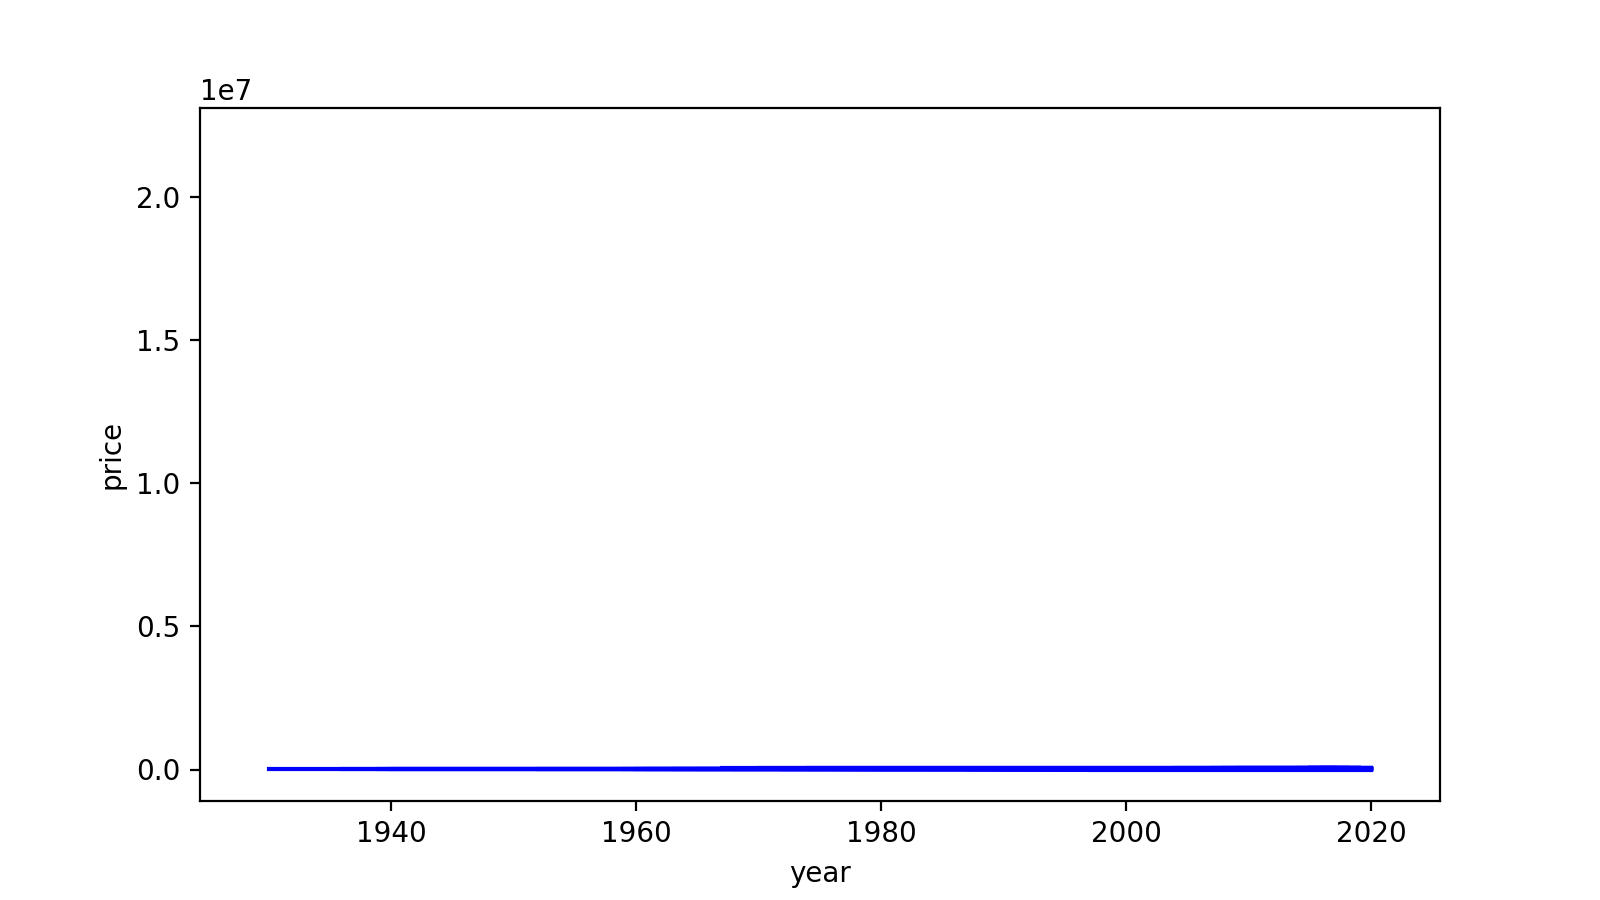

In [49]:
# visualize all features against the target varible 
for feature in selected_features_merged_df.columns[0:10]:
    plt.figure(figsize=(8, 4.5))
    sns.lineplot(data=sample_df, x=feature, y='price', hue = 'price', palette= 'winter', legend=False)

### 3.3. Model Construction
* Conduct your hypothesis test(s) here.
* For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch
* Apply machine learning algorithms (apply at least three different algorithms)
* Train your algorithms

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

In [37]:
# linear

def linear():

    model = LinearRegression().fit(X=X_train_selected, y=y_train)

    print('Linear Regression' + ": \n\t" + "R-squared value for training set:  " 
          + str(r2_score(y_train, model.predict(X_train_selected))),
          "\n\t"
          +"R-squared value for testing set:  "
          + str(r2_score(y_test, model.predict(X_test_selected)))
          + "\n")
        

In [38]:
linear()

Linear Regression: 
	R-squared value for training set:  0.4216520082888784 
	R-squared value for testing set:  0.0009670834188668653



In [39]:
# ridge and lasso
param_grid = {"alpha": [.001,.01,.1,1,10,100]}

alpha_estimators = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter = 10000)}

def regressors_percentage_split():
    
    for estimator_name, estimator_object in alpha_estimators.items():

        grid_search = GridSearchCV(estimator_object, param_grid, cv = 5)
        
        #train the model using the training dataset
        model = grid_search.fit(X = X_train_selected, y = y_train)

        #result of grid search
        print(estimator_name + ":")
        print("\t","Best parameters: ", grid_search.best_params_)
        print("\t", "Best cross-validation score: ", grid_search.best_score_)

        #the performance of the best found parameters on the test set
        #this is what you report for the evaluation of your model
        print("\t","Test set score: ", grid_search.score(X_test_selected, y_test))

In [40]:
regressors_percentage_split()

Ridge:
	 Best parameters:  {'alpha': 1}
	 Best cross-validation score:  0.42093957442693625
	 Test set score:  0.0009664714437476185
Lasso:
	 Best parameters:  {'alpha': 1}
	 Best cross-validation score:  0.4209380644702371
	 Test set score:  0.0009664108291884688


In [41]:
# support vector machine
param_grid = {"C": [.001,.01,.1,1,10,100]}

def svm():

    # knn with praram grid and 5-fold evaluation
    grid_search = GridSearchCV(LinearSVR(max_iter = 1000000), param_grid, cv = 5)

    #fit the grid search object on the training data
    grid_search.fit(X = X_train_selected, y = y_train)

    print("Support Vector Machine:")
    #result of grid search
    print("\t","Best parameters: ", grid_search.best_params_)
    #the performance of the best found parameters on the training and test set
    print("\t","Training set score with best parameters: ", grid_search.score(X_train_selected, y_train))
    print("\t","Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))
    

In [ ]:
svm()

In [42]:
# k-nearest neighbors
param_grid = {"n_neighbors": [1,3,5,8,10], "metric" : ["euclidean","manhattan",'minkowski']}

def grid_search_kNN():

    # knn with praram grid and 5-fold evaluation
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5)

    #fit the grid search object on the training data
    grid_search.fit(X = X_train_selected, y = y_train)

    print("k-Nearest Neighbor:")
    #result of grid search
    print("\t","Best parameters: ", grid_search.best_params_)
    #the performance of the best found parameters on the training and test set
    print("\t","Training set score with best parameters: ", grid_search.score(X_train_selected, y_train))
    print("\t","Test set score with best parameters: ", grid_search.score(X_test_selected, y_test))
    

In [43]:
grid_search_kNN()

k-Nearest Neighbor:
	 Best parameters:  {'metric': 'manhattan', 'n_neighbors': 10}
	 Training set score with best parameters:  0.6153018125287402
	 Test set score with best parameters:  0.0010794323376516202


### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your **validation set**
    * Use at least two different metrics 
* Evaluate your results from multiple ML models and hypothesis tests
    * What was the performance of each algorithm in plain English? Is there any indication of overfitting/underfitting?
    * Was there a significant difference? Use the template from lecture slides when reporting the results of your hypothesis testing.

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

In [ ]:
def kcross_LinearRegression():
    #function to tune kNN regression algorithm for best parameters, yields, and performance
    
    grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected, y=y_train)
    

    #find best paramaters
    print("Best parameters: ", grid_search.best_params_)
    
    return grid_search

In [ ]:
# define the parameter values that should be searched
r = uniform.rvs(0,2,size=100)
param_grid = {"alpha":r}

In [ ]:
def grid_search_Ridge():
    #function to tune kNN regression algorithm for best parameters, yields, and performance
    
    grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected, y=y_train)
    

    #find best paramaters
    print("Best parameters: ", grid_search.best_params_)
    
    return grid_search

In [ ]:
Ridge_tuned = grid_search_Ridge()

### 3.6. Model Testing
* Test your tuned algorithms using your **testing set**

In [ ]:
def test_tunedRidge():
    #function that iterates over several ML algorithms and finds their percentage-split
        
        model = Ridge_tuned.fit(X=X_train_selected, y=y_train)
        R_train = r2_score(y_train, model.predict(X_train_selected))
        R_test = r2_score(y_test, model.predict(X_test_selected))  
        
        print("\tR-squared value for training set: ", round(R_train,4))
        print("\tR-squared value for testing set: ", round(R_test,4))

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.